<a href="https://colab.research.google.com/github/Labibbib/-Group-G-Capstone_Project_01/blob/main/%5BGroup_G%5DCapstone_Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Kelompok G] Capstone Project 01**


| **Nama** | **NIM**| **Kelas** |
| -------- | -------- | -------- |
| Deswita Nur Ardias Farsha | 11220940000002   | DS 2   |
| Aisya Shalifa  | 11220940000032   | DS 1   |
| Ibnullabib     | 11220940000037   | D2 2   |
| Rihadatulaisy Nahsya Arawinda  | 11220940000059   | DS 2   |
| Rachmat Nadhief Priatno | 11220940000074   | DS 1   |

# **Pendahuluan**

Tracer Study Fakultas Sains dan Teknologi (FST) UIN Jakarta
Salam hormat, para Alumni Fakultas Sains dan Teknologi (FST) UIN Jakarta, semoga dalam keadaan sehat dan bahagia selalu.

Tracer study merupakan bagian penting dari proses pelaksanaan akademik sebagai umpan balik sehingga kualitas pendidikan di FST khususnya program sarjana dan pascasarjana dapat terjaga dan semakin lebih baik untuk di masa mendatang. Data tracer study ini sangat membantu dalam proses akreditasi, penyusunan kurikulum dan menguatkan jejaring alumni.

Kami menjamin kerahasiaan dan keamanan data saudara, silakan mengisi/menjawab pertanyaan dalam tautan google sheet berikut ini :

Terima kasih atas kesedian saudara dalam mengisi tracer study ini, mohon juga bisa membantu untuk menyebarkan kepada rekan alumni program Sarjana Fakultas Sains dan Teknologi  yang lain.

<br>

**Task:**

Anda adalah data analyst UIN Jakarta. Saat ini anda ditugaskan oleh Rektor dan ketua Puskarir UIN Jakarta untuk melaporkan hasil analisa tracer study alumni FST. Anda diminta untuk memberikan insight dan rekomendasi ke UIN Jakarta secara umum berdasarkan hasil analisa data yang dilakukan.

# **Install dan Import Library yang Diperlukan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
!pip install kmodes
from kmodes.kprototypes import KPrototypes
import pickle
!pip install -U scikit-learn
from sklearn.manifold import TSNE

# **Load Data**

In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Labibbib/-Group-G-Capstone_Project_01/refs/heads/main/alumni.csv

--2024-10-28 00:53:37--  https://raw.githubusercontent.com/Labibbib/-Group-G-Capstone_Project_01/refs/heads/main/alumni.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105802 (103K) [text/plain]
Saving to: ‘data/alumni.csv’

alumni.csv          100%[===================>] 103.32K  --.-KB/s    in 0.08s   

2024-10-28 00:53:37 (1.34 MB/s) - ‘data/alumni.csv’ saved [105802/105802]



In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('data/alumni.csv', sep=',')

## **Memeriksa ukuran data**

In [4]:
print(type(df))
N, P = df.shape
'baris = ', N, ', kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 435, ', kolom = ', 23)

In [5]:
df.head()

,Timestamp,Nomor Induk Mahasiswa (NIM),Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,No HP (WhatsApp):,email,Waktu Mendapatkan Pekerjaan:,Status saat ini:,Tahun Wirausaha,Bidang wirausaha:,Perusahaan,Posisi,Penghasilan,Univeritas,Tahun Masuk Studi Lanjut:,Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Saran,Program Studi,Lama Bekerja di Institusi Saat ini:,Kota tempat bekerja saat Ini
0,7/3/2024 8:09:53,1,2019,2023,Februari,85267511845,1@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,NaN,NaN
1,6/4/2024 11:27:37,2,2018,2024,Mei,85267511846,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
2,6/4/2024 11:28:30,3,2018,2024,Mei,85267511847,3@gmail.com,6-12 bulan,Karyawan Swasta,NaN,NaN,AHHA Korpora Indonesia,Host Live,NaN,NaN,NaN,NaN,5,5,NaN,Agribisnis S1,NaN,NaN
3,6/4/2024 11:28:54,4,2017,2024,Mei,85267511848,1@gmail.com,Kurang dari 3 bulan.,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN
4,6/4/2024 11:29:03,5,2019,2024,Mei,85267511849,2@gmail.com,Belum mendapatkan pekerjaan,Melamar Pekerjaan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,Agribisnis S1,NaN,NaN


## **Memeriksa duplikat dan missing value**

In [6]:
df.duplicated().sum()

0

In [7]:
print(df.isnull().sum())

Timestamp                                                           0
Nomor Induk Mahasiswa (NIM)                                         0
Tahun Masuk UIN Jakarta                                             0
Tahun Wisuda                                                        0
Bulan Wisuda                                                        0
No HP (WhatsApp):                                                   0
email                                                               0
Waktu Mendapatkan Pekerjaan:                                        0
Status saat ini:                                                   12
Tahun Wirausaha                                                   389
Bidang wirausaha:                                                 388
Perusahaan                                                        205
Posisi                                                            203
Penghasilan                                                       229
Univeritas          

Dari output yang dikeluarkan tidak ada data yang terduplikasi, tetapi terdapat banyak sekali missing value dari data ini. Dapat dilihat juga bahwa terdapat dua kolom yang isinya hanya nan, yaitu kolom `'Lama Bekerja di Institusi Saat ini:'` dan `'Kota tempat bekerja saat Ini'`.

# **Preprocessing**

## **Menghapus kolom yang tidak diperlukan**

In [8]:
df.columns

Index(['Timestamp', 'Nomor Induk Mahasiswa (NIM)', 'Tahun Masuk UIN Jakarta',
       'Tahun Wisuda', 'Bulan Wisuda', 'No HP (WhatsApp):', 'email',
       'Waktu Mendapatkan Pekerjaan:', 'Status saat ini:', 'Tahun Wirausaha',
       'Bidang wirausaha:', 'Perusahaan', 'Posisi', 'Penghasilan',
       'Univeritas', 'Tahun Masuk Studi Lanjut:',
       'Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta: ',
       'Kesesuaian Kurikulum:', 'Kesesuaian Bidang Ilmu:', 'Saran',
       'Program Studi', 'Lama Bekerja di Institusi Saat ini:',
       'Kota tempat bekerja saat Ini'],
      dtype='object')

In [9]:
df = df.drop(['Timestamp', 'No HP (WhatsApp):', 'email', 'Lama Bekerja di Institusi Saat ini:', 'Kota tempat bekerja saat Ini'], axis=1)

Di sini kami menghapus kolom yang berisi identitas pribadi dan dua kolom yang isinya hanya null. Alasan kami menghapus kolom tersebut karena isinya hanya data pribadi yang tidak cukup memberikan insight. Di sini kami membiarkan kolom NIM supaya setiap datanya unique.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Nomor Induk Mahasiswa (NIM)                                     435 non-null    int64 
 1   Tahun Masuk UIN Jakarta                                         435 non-null    object
 2   Tahun Wisuda                                                    435 non-null    object
 3   Bulan Wisuda                                                    435 non-null    object
 4   Waktu Mendapatkan Pekerjaan:                                    435 non-null    object
 5   Status saat ini:                                                423 non-null    object
 6   Tahun Wirausaha                                                 46 non-null     object
 7   Bidang wirausaha:                                             

## **Mengoreksi tipe variabel data**

In [11]:
# Mengubah tipe data pada variabel menjadi int64
df['Tahun Wirausaha'] = pd.to_numeric(df['Tahun Wirausaha'], errors='coerce').astype('Int64')
# Memperbaiki typo pada Tahun Masuk UIN Jakarta
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].replace('2019 Genap', 2019)
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].astype('int64')
# Memperbaiki typo pada Tahun Wisuda
df['Tahun Wisuda'] = df['Tahun Wisuda'].replace('22 Oktober 2020', 2020)
df['Tahun Wisuda'] = df['Tahun Wisuda'].astype('int64')

In [12]:
# Mengubah tipe data
df['Bulan Wisuda'] = df['Bulan Wisuda'].astype('category')
df['Waktu Mendapatkan Pekerjaan:'] = df['Waktu Mendapatkan Pekerjaan:'].astype('category')
df['Kesesuaian Kurikulum:'] = df['Kesesuaian Kurikulum:'].astype('category')
df['Kesesuaian Bidang Ilmu:'] = df['Kesesuaian Bidang Ilmu:'].astype('category')
df['Program Studi'] = df['Program Studi'].astype('category')
df['Status saat ini:'] = df['Status saat ini:'].astype('category')

Masih ada variabel yang belum dikoreksi tipenya yaitu variabel 'Penghasilan' dan 'Tahun Masuk Studi Lanjut' karena ada noise di variabel tersebut.

## **Mengubah nama variabel yang terdapat ":"**

Setelah tadi kami melihat nama-nama kolom, terdapat karakter/tanda `":"` di suatu kolom. Jadi, agar terlihat lebih rapih, kami ingin menghapusnya. Dan juga kami mengubah kolom yang namanya terlalu panjang, yaitu kolom `"Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta"`

In [13]:
df.rename(columns={'Nama jurusan/program studi setelah Kuliah di FST UIN Jakarta: ': 'Program Studi Lanjutan',
                   'Nomor Induk Mahasiswa (NIM)':'NIM',
                   'Univeritas':'Universitas'}, inplace=True)

In [14]:
df.columns = df.columns.str.replace(':', '')

## **Penanganan Noise**

In [15]:
kolom = df.columns
for i in kolom:
  print("\n", i,":")
  if df[i].dtype == 'category':
    print(df[i].cat.categories)
  else:
    print(df[i].unique())


 NIM :
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

### *Tahun Masuk UIN Jakarta*

In [16]:
df['Tahun Masuk UIN Jakarta'] = df['Tahun Masuk UIN Jakarta'].replace({
    206: 2006,
    11180910000098: 2018,
    208: 2018})

### *Waktu Mendapatkan Pekerjaan*

In [17]:
df['Waktu Mendapatkan Pekerjaan'] = df['Waktu Mendapatkan Pekerjaan'].replace({
                                    '3-6 Bulan':'3',
                                    '6-12 bulan':'6',
                                    'Kurang dari 3 bulan.':'2',
                                    'lebih dari 12 bulan.':'>12 bulan',
                                    'Belum mendapatkan pekerjaan':'Belum kerja',
                                    'Tidak berencana mencari pekerjaan':'Tidak mencari pekerjaan'
                                  })

<ipython-input-17-e9a3aca35ca4>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Waktu Mendapatkan Pekerjaan'] = df['Waktu Mendapatkan Pekerjaan'].replace({


### *Status saat ini*

In [18]:
df['Status saat ini'].cat.categories

Index(['ASN/PNS', 'Akan mencari pekerjaan', 'Belum mendapat pekerjaan',
       'Content Creator', 'Free Lancer dan Co-Founder', 'Freelance',
       'Internship', 'Internship ', 'Karyawan ', 'Karyawan BUMD',
       'Karyawan BUMN', 'Karyawan Swasta', 'Magang', 'Mahasiswa',
       'Masih dalam pendidikan untuk persyaratan pekerjaan',
       'Melamar Pekerjaan', 'Melanjutkan Studi', 'Mendaftar studi magister',
       'Mendapatkan Pekerjaan', 'Menganggur', 'Mengelola Yayasan Pendidikan',
       'Mengurus Rumah Tangga', 'Operator Sekolah', 'Part time',
       'Pegawai Tetap ', 'Pegawai tidak tetap instansi pemerintah',
       'Pekerja Harian Lepas', 'Pengajar', 'Pengajar les dan wirausaha',
       'Proses Wisuda', 'Research Assistant', 'Staf', 'Staff laboratorium ',
       'Wirausaha', 'internship', 'mengikuti pelatihan'],
      dtype='object')

In [19]:
lamar_kerja = ['Mendapatkan Pekerjaan', 'Akan mencari pekerjaan']
df['Status saat ini'] = df['Status saat ini'].replace(lamar_kerja, 'Melamar Pekerjaan')

<ipython-input-19-fb8c60c679fa>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(lamar_kerja, 'Melamar Pekerjaan')


In [20]:
df['Status saat ini'] = df['Status saat ini'].replace(['Pegawai tidak tetap instansi pemerintah','Staf', 'Pegawai Tetap '], 'ASN/PNS') # Staf dan Pegawai Tetap setelah dicek, kerja di UIN
df['Status saat ini'] = df['Status saat ini'].replace(['Mendapatkan Pekerjaan','Operator Sekolah','Staff laboratorium '], 'Karyawan Swasta')

<ipython-input-20-1f67f139c728>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(['Pegawai tidak tetap instansi pemerintah','Staf', 'Pegawai Tetap '], 'ASN/PNS') # Staf dan Pegawai Tetap setelah dicek, kerja di UIN
<ipython-input-20-1f67f139c728>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(['Mendapatkan Pekerjaan','Operator Sekolah','Staff laboratorium '], 'Karyawan Swasta')


In [21]:
belum_kerja = ['Belum mendapat pekerjaan','Mahasiswa','Proses Wisuda','Menganggur', 'Akan mencari pekerjaan', 'Karyawan '] # 'Karyawan ' setelah dicek ternyata belum kerja
df['Status saat ini'] = df['Status saat ini'].replace(belum_kerja, 'Belum Kerja')

<ipython-input-21-8a6045d00d75>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(belum_kerja, 'Belum Kerja')


In [22]:
freelance = ['Part time', 'Pekerja Harian Lepas']
df['Status saat ini'] = df['Status saat ini'].replace(freelance, 'Freelance')
df['Status saat ini'] = df['Status saat ini'].replace('Free Lancer dan Co-Founder', 'Co-Founder')

<ipython-input-22-544faaabd173>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(freelance, 'Freelance')
<ipython-input-22-544faaabd173>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace('Free Lancer dan Co-Founder', 'Co-Founder')


In [23]:
lanjut_studi = ['Masih dalam pendidikan untuk persyaratan pekerjaan', 'Mendaftar studi magister']
df['Status saat ini'] = df['Status saat ini'].replace(lanjut_studi, 'Melanjutkan Studi')

<ipython-input-23-6d1638823ba3>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(lanjut_studi, 'Melanjutkan Studi')


In [24]:
intern = ['Internship', 'Internship ','internship','mengikuti pelatihan']
df['Status saat ini'] = df['Status saat ini'].replace(intern, 'Magang')

<ipython-input-24-62932ac99492>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Status saat ini'] = df['Status saat ini'].replace(intern, 'Magang')


### *Penghasilan*

In [25]:
df[df['Penghasilan'] == '49']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
103,104,2016,2021,Februari,6,Karyawan BUMN,<NA>,NaN,PT Bank Mandiri (Persero) Tbk,Cust Service Administrative,49,NaN,NaN,NaN,4,4,NaN,Fisika


In [26]:
df[df['Penghasilan'] == '250']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
318,319,2018,2023,Februari,4,Wirausaha,2024,makanan ringan dan pernak pernik,-,-,250,-,-,-,2,2,tidak ada sudah cukup,Prodi Biologi


In [27]:
df[df['Penghasilan'] == '300,000']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
248,249,2019,2024,Juni,Belum kerja,Wirausaha,2024,Menjual tiket saat ada suatu acara,NaN,NaN,"300,000",NaN,NaN,NaN,5,4,NaN,Prodi Kimia


In [28]:
df['Penghasilan'] = df['Penghasilan'].replace({
    '11,000': '11',
    '5,000,000': '5',
    '7,000': '7',
    '49':'4.9',
    '2,500': '2.5',
    '300,000': '0.3',
    '6,700,000': '6.7',
    '250': '2.5'
    })

Pada variabel penghasilan, kami menemukan kejanggalan yaitu pada penghasilan '49', '250', dan '300,000'. Setelah kami mengecek datanya dan menyesuaikan dengan posisi dan tahun wirausaha (yang wirausaha adalah data yang memiliki penghasilan '250' dan '300,000') kami mengganti '49' menjadi '4.9', '250' menjadi '2.5', dan '300,000' menjadi '0.3'. Lalu kami mengoreksi tipe data penghasilan ke float

### *Universitas*

In [29]:
df['Universitas'].unique()

array([nan, '-', 'Universitas Indonesia', '5,000,000',
       'Universitas Indonesia (Depok)',
       'Innopolis University, Tatarstan, Russia', 'Belum',
       'Institut Pertanian Bogor', 'Universitas Mercubuana ', 'IPB',
       'Uin', 'Kwik Kian Gie School of Business (Jakarta)',
       'Universitas Krisnadwipanaya (UNKRIS)',
       'Universitas Indonesia, University of Groningen',
       'ITB Bandung, UGM', 'Universitas Indonesia, Depok',
       'Politeknik Elektronika Negeri Surabaya',
       'S2: Universitas Indonesia, S3: Institut Teknologi Bandung',
       'ITB Bandung', 'Universitas Islam As-Syafi’iyah ',
       'Kota Tangerang', 'IPB ', 'Universitas Indonesia ',
       'IPB University', 'Universitas Andalas, Padang ', 'IPB, UGM, UI',
       '—', 'Baru mau mendaftar di semester genap', 'UGM'], dtype=object)

In [30]:
univ_mapping = {
    'IPB ': 'IPB',
    'IPB': 'IPB',
    'IPB University': 'IPB',
    'Institut Pertanian Bogor': 'IPB',
    'ITB Bandung': 'ITB',
    'Institut Teknologi Bandung': 'ITB',
    'UGM': 'UGM',
    'Universitas Gadjah Mada': 'UGM',
    'Universitas Indonesia': 'UI',
    'Universitas Indonesia (Depok)': 'UI',
    'Universitas Indonesia, Depok': 'UI',
    'Uin': 'UIN',
    'Universitas Andalas, Padang ': 'Universitas Andalas',
    'Universitas Krisnadwipanaya (UNKRIS)': 'UNKRIS',
    'Kwik Kian Gie School of Business (Jakarta)': 'Kwik Kian Gie School of Business',
    'Politeknik Elektronika Negeri Surabaya': 'Politeknik Elektronika Negeri Surabaya',
    'Innopolis University, Tatarstan, Russia': 'Innopolis University',
    'Universitas Mercubuana': 'Universitas Mercubuana',
    'Baru mau mendaftar di semester genap':None,
    '5,000,000':None,
    'Kota Tangerang':None,
    'Belum':None}

# Mengoreksi variabel 'Universitas' sesuai dengan univ_mapping
df['Universitas'] = df['Universitas'].replace(univ_mapping)

### *Tahun Masuk Studi Lanjut (S2)*

In [31]:
df['Tahun Masuk Studi Lanjut'].unique()

array([nan, '-', '2018', '2024', '2021', '2019', '2008', '2020', '2022',
       '2016, 2024', '2012 ITB, dan 2019 UGM', '2023',
       'S2: 2019, S3: 2023', '2009', '2025', '2016', '0', '—',
       'Baru mau mendaftar di semester genap'], dtype=object)

In [32]:
df[df['Tahun Masuk Studi Lanjut']=='Baru mau mendaftar di semester genap']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
329,330,2018,2023,Agustus,1,Melanjutkan Studi,2023,Jasa Wisata Alam dan Jasa Laundry Sepatu,"Sudah tidak bekerja, perusahaan sebelumnya (Mu...",Laboran,5,None,Baru mau mendaftar di semester genap,Baru mau mengambil jurusan Management sustaina...,2,4,Masih kurang dalam bidang spesifik ekologi dan...,Prodi Biologi


In [33]:
# Mengubah data yang tahun masuknya adalah baru mau mendaftar dan program studi adalah baru mau mengambil ke None
df['Program Studi Lanjutan'] = df['Program Studi Lanjutan'].replace('Baru mau mengambil jurusan Management sustainability Tourism', None)
df['Tahun Masuk Studi Lanjut'] = df['Tahun Masuk Studi Lanjut'].replace({'Baru mau mendaftar di semester genap':None})

In [34]:
df[df['Tahun Masuk Studi Lanjut']=='2016, 2024']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
96,97,2011,2015,November,2,Melanjutkan Studi,<NA>,-,UIN Syarif Hidayatullah Jakarta,Dosen Tidak Tetap,NaN,"Universitas Indonesia, University of Groningen","2016, 2024","Ilmu Fisika, Graduate School of Science and En...",5,5,Laboratorium riset khusus dosen-dosen Fisika m...,Fisika


In [35]:
df[df['Tahun Masuk Studi Lanjut']=='2012 ITB, dan 2019 UGM']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
98,99,2009,2010,Agustus,2,ASN/PNS,<NA>,NaN,BMKG,Ketua Tim Bidang Geofisika Potensial,14,"ITB Bandung, UGM","2012 ITB, dan 2019 UGM",Sains kebumian dan geografi,4,4,NaN,Fisika


In [36]:
df[df['Tahun Masuk Studi Lanjut']=='S2: 2019, S3: 2023']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas,Tahun Masuk Studi Lanjut,Program Studi Lanjutan,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi
107,108,2013,2017,November,2,Melanjutkan Studi,<NA>,NaN,Institut Teknologi Bandung,Mahasiswa Doktoral,NaN,"S2: Universitas Indonesia, S3: Institut Teknol...","S2: 2019, S3: 2023","Magister Ilmu Fisika, Doktor Fisika",4,5,"Kesan: Mata kuliah peminatan cukup banyak, yan...",Fisika


In [37]:
# Mengubah ketiga nama kolom berikut ke S2, lalu menambahkan kolom baru untuk S3
df = df.rename(columns={'Universitas': 'Universitas S2',
                        'Tahun Masuk Studi Lanjut':'Tahun Masuk Studi Lanjut S2',
                        'Program Studi Lanjutan':'Program Studi S2'})

# Membuat kolom baru khsusus S3
df['Universitas S3'] = None
df['Tahun Masuk Studi Lanjut S3'] = None
df['Program Studi S3'] = None


# Untuk NIM 97 pada kolom baru S2
df['Universitas S2']=df['Universitas S2'].replace('Universitas Indonesia, University of Groningen','UI')
df['Tahun Masuk Studi Lanjut S2']=df['Tahun Masuk Studi Lanjut S2'].replace('2016, 2024','2016')
df['Program Studi S2']=df['Program Studi S2'].replace('Ilmu Fisika, Graduate School of Science and Engineering','Ilmu Fisika')

# Untuk NIM 99 pada kolom baru S2
df['Universitas S2']=df['Universitas S2'].replace('ITB Bandung, UGM','ITB')
df['Tahun Masuk Studi Lanjut S2']=df['Tahun Masuk Studi Lanjut S2'].replace('2012 ITB, dan 2019 UGM','2012')

# Untuk NIM 108 pada kolom baru S2
df['Universitas S2']=df['Universitas S2'].replace('S2: Universitas Indonesia, S3: Institut Teknologi Bandung','UI')
df['Tahun Masuk Studi Lanjut S2']=df['Tahun Masuk Studi Lanjut S2'].replace('S2: 2019, S3: 2023','2019')
df['Program Studi S2']=df['Program Studi S2'].replace('Magister Ilmu Fisika, Doktor Fisika','Magister Ilmu Fisika')


# Untuk NIM 97 pada kolom baru S3
df.loc[df['NIM'] == 97, 'Universitas S3'] = 'University of Groningen'
df.loc[df['NIM'] == 97, 'Tahun Masuk Studi Lanjut S3'] = '2024'
df.loc[df['NIM'] == 97, 'Program Studi S3'] = 'Graduate School of Science and Engineering'

# Untuk NIM 99 pada kolom baru S3
df.loc[df['NIM'] == 99, 'Universitas S3'] = 'UGM'
df.loc[df['NIM'] == 99, 'Tahun Masuk Studi Lanjut S3'] = '2019'
df.loc[df['NIM'] == 99, 'Program Studi S3'] = 'Geografi'

# Untuk NIM 108 pada kolom baru S3
df.loc[df['NIM'] == 108, 'Universitas S3'] = 'ITB'
df.loc[df['NIM'] == 108, 'Tahun Masuk Studi Lanjut S3'] = '2023'
df.loc[df['NIM'] == 108, 'Program Studi S3'] = 'Doktor Fisika'

In [38]:
df[df['Tahun Masuk Studi Lanjut S2']=='2025']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3
274,275,2019,2023,Agustus,3,Pengajar,<NA>,-,Yayasan Nurul Ikhlas,Staff,25,"IPB, UGM, UI",2025,"Biokimia, Magister Kimia, ilmu Kimia",5,5,Pesan: Pesan dan harapan saya agar prodi kimia...,Prodi Kimia,None,None,None


In [39]:
# Menghapus baris yang tahun masuk studi lanjutnya tidak valid
df = df[df['NIM']!=275]

### *Program Studi*

In [40]:
df['Program Studi'].cat.categories

Index(['Agribisnis S1', 'Agribisnis S2', 'Biologi', 'Fisika', 'Kimia',
       'Matematika', 'Prodi Agribisnis', 'Prodi Biologi', 'Prodi Kimia',
       'Prodi MAG', 'Prodi Matematika', 'Prodi TI',
       'Prodi Teknik Pertambangan', 'Teknik Informatika'],
      dtype='object')

In [41]:
df['Program Studi'] = df['Program Studi'].replace({'Prodi Agribisnis':'Agribisnis S1',
                                                   'Prodi MAG':'Agribisnis S2',
                                                   'Teknik Informatika':'Prodi TI',
                                                   'Kimia':'Prodi Kimia',
                                                   'Biologi':'Prodi Biologi',
                                                   'Fisika':'Prodi Fisika',
                                                   'Matematika':'Prodi MTK',
                                                   'Prodi Matematika':'Prodi MTK'})

<ipython-input-41-183729164c2d>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Program Studi'] = df['Program Studi'].replace({'Prodi Agribisnis':'Agribisnis S1',
<ipython-input-41-183729164c2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Program Studi'] = df['Program Studi'].replace({'Prodi Agribisnis':'Agribisnis S1',


In [42]:
df[df['Program Studi S2']=='Mag']

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3
82,83,2019,2021,Agustus,Tidak mencari pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10,UIN,2019,Mag,5,5,Lebih di percepat,Agribisnis S2,None,None,None


In [43]:
# Disini kami menemukan anomali yang dia merupakan alumni S2 tapi mengisi univ lanjutan S2 nya adalah sama dengan univnya sekarang
df['Universitas S2'] = df['Universitas S2'].replace('UIN', None)
df['Tahun Masuk Studi Lanjut S2'] = df['Tahun Masuk Studi Lanjut S2'].replace('2019', None)
df['Program Studi S2'] = df['Program Studi S2'].replace('Mag', None)

<ipython-input-43-c857f2f9ed35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Universitas S2'] = df['Universitas S2'].replace('UIN', None)
<ipython-input-43-c857f2f9ed35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tahun Masuk Studi Lanjut S2'] = df['Tahun Masuk Studi Lanjut S2'].replace('2019', None)
<ipython-input-43-c857f2f9ed35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

### *Lama Studi*

In [44]:
# Membuat Kolom baru 'Lama Studi' dimana kolom tersebut merupakan selisih antara 'Tahun Wisuda' dan 'Tahun Masuk UIN Jakarta'
df['Lama Studi'] = df['Tahun Wisuda'] - df['Tahun Masuk UIN Jakarta']

In [45]:
df['Lama Studi'].unique()

array([4, 6, 7, 5, 2, 3, 1])

In [46]:
df[(df['Lama Studi']==1) | (df['Lama Studi']==2) | (df['Lama Studi']==3)]

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3,Lama Studi
50,51,2021,2023,Agustus,Tidak mencari pekerjaan,ASN/PNS,<NA>,NaN,Kementerian Pertanian,Koodinator Kelompok Subtansi Kelembagaan Pembi...,15,NaN,NaN,NaN,3,4,Penyesuaian kurikulum sejalan dengan perkemban...,Agribisnis S2,None,None,None,2
79,80,2020,2023,Mei,6,ASN/PNS,<NA>,NaN,Universitas Terbuka,Dosen (Asisten Ahli),5,NaN,NaN,NaN,5,3,Mohon komunikasi internal organisasi di antara...,Agribisnis S2,None,None,None,3
82,83,2019,2021,Agustus,Tidak mencari pekerjaan,ASN/PNS,2021,trading agribisnis,Pt. Citra niaga pangan,Ketua Tim Kerja,10,None,None,None,5,5,Lebih di percepat,Agribisnis S2,None,None,None,2
85,86,2020,2023,Mei,2,Wirausaha,2011,Jasa Konsultan,PT. Jagad Raya Konstindo,Tenaga Ahli,NaN,NaN,NaN,NaN,4,4,Tetap pertahankan matakuliah dimasukkan kaidah...,Agribisnis S2,None,None,None,3
92,93,2020,2023,Mei,2,ASN/PNS,<NA>,NaN,Kementerian Pertanian,Analis Prasarana dan Sarana Pertanian,9,NaN,NaN,NaN,5,5,"Sejauh ini sudah baik, seluruh dosen dan admin...",Agribisnis S2,None,None,None,3
98,99,2009,2010,Agustus,2,ASN/PNS,<NA>,NaN,BMKG,Ketua Tim Bidang Geofisika Potensial,14,ITB,2012,Sains kebumian dan geografi,4,4,NaN,Prodi Fisika,UGM,2019,Geografi,1


In [47]:
df[(df['Lama Studi']==3)]

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3,Lama Studi
79,80,2020,2023,Mei,6,ASN/PNS,<NA>,NaN,Universitas Terbuka,Dosen (Asisten Ahli),5,NaN,NaN,NaN,5,3,Mohon komunikasi internal organisasi di antara...,Agribisnis S2,None,None,None,3
85,86,2020,2023,Mei,2,Wirausaha,2011,Jasa Konsultan,PT. Jagad Raya Konstindo,Tenaga Ahli,NaN,NaN,NaN,NaN,4,4,Tetap pertahankan matakuliah dimasukkan kaidah...,Agribisnis S2,None,None,None,3
92,93,2020,2023,Mei,2,ASN/PNS,<NA>,NaN,Kementerian Pertanian,Analis Prasarana dan Sarana Pertanian,9,NaN,NaN,NaN,5,5,"Sejauh ini sudah baik, seluruh dosen dan admin...",Agribisnis S2,None,None,None,3


In [48]:
#Menghapus 'Lama Studi' yang nilainya sama dengan 1 dan 2
df = df[(df['Lama Studi'] != 1) & (df['Lama Studi'] != 2)]

Kami menghapus lama studi yang hanya 1 dan 2 tahun karena menurut kami itu tidak mungkin.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 0 to 434
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   NIM                          431 non-null    int64   
 1   Tahun Masuk UIN Jakarta      431 non-null    int64   
 2   Tahun Wisuda                 431 non-null    int64   
 3   Bulan Wisuda                 431 non-null    category
 4   Waktu Mendapatkan Pekerjaan  431 non-null    category
 5   Status saat ini              419 non-null    category
 6   Tahun Wirausaha              29 non-null     Int64   
 7   Bidang wirausaha             45 non-null     object  
 8   Perusahaan                   226 non-null    object  
 9   Posisi                       228 non-null    object  
 10  Penghasilan                  202 non-null    object  
 11  Universitas S2               40 non-null     object  
 12  Tahun Masuk Studi Lanjut S2  36 non-null     object  
 13  Program St

## **Missing Values**

Kami membiarkan missing value karena di sini kami hanya EDA dan tidak membuat model.

In [50]:
df.columns

Index(['NIM', 'Tahun Masuk UIN Jakarta', 'Tahun Wisuda', 'Bulan Wisuda',
       'Waktu Mendapatkan Pekerjaan', 'Status saat ini', 'Tahun Wirausaha',
       'Bidang wirausaha', 'Perusahaan', 'Posisi', 'Penghasilan',
       'Universitas S2', 'Tahun Masuk Studi Lanjut S2', 'Program Studi S2',
       'Kesesuaian Kurikulum', 'Kesesuaian Bidang Ilmu', 'Saran',
       'Program Studi', 'Universitas S3', 'Tahun Masuk Studi Lanjut S3',
       'Program Studi S3', 'Lama Studi'],
      dtype='object')

In [51]:
def ubah_nan(df):
  col = ['NIM', 'Tahun Masuk UIN Jakarta', 'Tahun Wisuda', 'Bulan Wisuda',
       'Waktu Mendapatkan Pekerjaan', 'Status saat ini', 'Tahun Wirausaha',
       'Bidang wirausaha', 'Perusahaan', 'Posisi', 'Universitas S2', 'Tahun Masuk Studi Lanjut S2', 'Program Studi S2',
       'Kesesuaian Kurikulum', 'Kesesuaian Bidang Ilmu', 'Saran',
       'Program Studi', 'Universitas S3', 'Tahun Masuk Studi Lanjut S3',
       'Program Studi S3', 'Lama Studi']
  noi = [np.nan, '-', '—', ' ', '0', 'tidak ada']
  for i in col:
    df[i] = df[i].replace(noi, pd.NA)

In [52]:
ubah_nan(df)

In [53]:
# Karena tadi di awal terdapat eror, maka tipe data 'Tahun Masuk Studi Lanjut' baru diubah ke int64 dan 'Penghasilan' ke float64
df['Tahun Masuk Studi Lanjut S2'] = df['Tahun Masuk Studi Lanjut S2'].astype('Int64')
df['Tahun Masuk Studi Lanjut S3'] = df['Tahun Masuk Studi Lanjut S3'].astype('Int64')
df['Penghasilan'] = df['Penghasilan'].astype('float64')

In [54]:
df.shape

(431, 22)

## **Outliers**

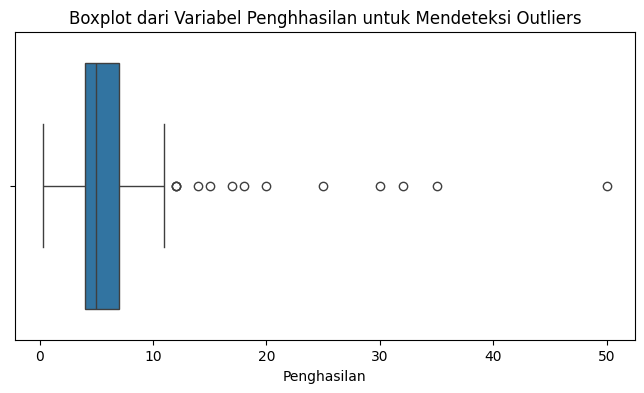

In [55]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df["Penghasilan"], orient="h")
plt.title('Boxplot dari Variabel Penghhasilan untuk Mendeteksi Outliers')
plt.show()

In [56]:
Q1_df = df["Penghasilan"].quantile(0.25)
Q3_df = df["Penghasilan"].quantile(0.75)
IQR = Q3_df - Q1_df #IQR is interquartile range.

no_out_df = (df["Penghasilan"] >= Q1_df - 1.5 * IQR) & (df["Penghasilan"] <= Q3_df + 1.5 *IQR)

#df_new = df[no_out_df] # data yang sudah tidak ada outlier

#df_out = df[~no_out_df] # data outlier

In [57]:
len(df[~no_out_df]) # banyak data outlier

242

In [58]:
len(df[no_out_df]) # banyak data tidak ada outlier

189

Karena missing value pada data ini kami biarkan, sehingga perhitungan outliernya tidak begitu akurat, sehingga outliernya juga kami biarkan. Salah satu alasan yang membuat kami yakin membiarkan missing value dan outlier karena data ini merupakan data primer artinya data ini dikumpulkan secara langsung melalui survey di platform google form.

## **Data Visualization**

### Membuat Cluster

Di sini kami ingin mencoba membuat clustering untuk mencari apakah data ini membentuk suatu pola.

#### **Standarisasi**

In [59]:
#standarisasi
col_num = ['Penghasilan']
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[col_num ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[col_num])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[col_num].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Setelah Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

       Penghasilan
count        202.0
mean           6.5
std            5.6
min            0.3
25%            4.0
50%            5.0
75%            7.0
max           50.0

Hasil Standarisasi

   Penghasilan
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN

Statistik Setelah Standarisasi

       Penghasilan
count        202.0
mean          -0.0
std            1.0
min           -1.0
25%           -0.0
50%           -0.0
75%            0.0
max            8.0


#### **Mengonversi Data Kategorik dengan Label Encoder**

In [60]:
df1=df

In [61]:
df1.dtypes

,0
NIM,int64
Tahun Masuk UIN Jakarta,int64
Tahun Wisuda,int64
Bulan Wisuda,category
Waktu Mendapatkan Pekerjaan,category
Status saat ini,category
Tahun Wirausaha,Int64
Bidang wirausaha,object
Perusahaan,object
Posisi,object


In [62]:
df1['Bidang wirausaha'] = df1['Bidang wirausaha'].astype('object')
df1['Perusahaan'] = df1['Perusahaan'].astype('object')
df1['Posisi'] = df1['Posisi'].astype('object')

In [63]:

# Mengisi nilai missing di kolom 'Status saat ini' dengan 'Belum Kerja'
df['Status saat ini'] = df['Status saat ini'].fillna('Belum Kerja')

# Membuat kondisi untuk pengelompokan data
kelstat = [
    df['Status saat ini'].isin(['Karyawan Swasta', 'Pengajar', 'Wirausaha', 'ASN/PNS', 'Karyawan BUMN', 'Freelance', 'Karyawan BUMD', 'Co-Founder', 'Mengelola Yayasan Pendidikan', 'Content Creator', 'Pengajar les dan wirausaha', 'Research Assistant']),
    df['Status saat ini'] == 'Melanjutkan Studi',
    df['Status saat ini'].isin(['Melamar Pekerjaan', 'Belum Kerja']),
    df['Status saat ini'] == 'Mengurus Rumah Tangga',
    df['Status saat ini'] == 'Magang'
]

# Kategori yang sesuai dengan kondisi
categories = ['Kerja', 'Melanjutkan Studi', 'Belum Kerja', 'Ibu Rumah Tangga', 'Magang']

# Menambahkan kolom baru dengan kategori yang dikelompokkan
df['Kelompok Status'] = np.select(kelstat, categories, default='lainnya')


In [64]:
# Membuat kolom baru dengan rentang nilai yang sesuai
df['Waktu Mendapatkan Pekerjaan'] = np.where(df['Waktu Mendapatkan Pekerjaan'].isin(['1', '2', '3', '4']), '1-4 bulan',
                                             np.where(df['Waktu Mendapatkan Pekerjaan'].isin(['5', '6', '7', '8']), '5-8 bulan',
                                             np.where(df['Waktu Mendapatkan Pekerjaan'].isin(['9', '10', '11', '12']), '9-12 bulan',
                                             df['Waktu Mendapatkan Pekerjaan'])))


In [65]:
# Get the indices of rows where 'Penghasilan' is null in df_model
null_penghasilan_indices = df[df['Penghasilan'].isnull()].index

# Dapatkan label numerik untuk 'Kerja' di kolom 'Kelompok Status'
kerja_label = 'Kerja'
# Get the indices of rows where 'Kelompok Status' is 'Kerja' in df_model
kerja_indices = df[df['Kelompok Status'] == kerja_label].index

# Get the intersection of the two index lists
filtered_indices = null_penghasilan_indices.intersection(kerja_indices)

# Filter the original dataframe 'df' using the common indices
df.filtered = df.loc[filtered_indices]

df.filtered.head()

<ipython-input-65-2e4006e86529>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.filtered = df.loc[filtered_indices]


,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3,Lama Studi,Kelompok Status
2,3,2018,2024,Mei,5-8 bulan,Karyawan Swasta,<NA>,<NA>,AHHA Korpora Indonesia,Host Live,NaN,<NA>,<NA>,<NA>,5,5,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,6,Kerja
5,6,2018,2024,Mei,1-4 bulan,Pengajar,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,3,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,6,Kerja
7,8,2010,2014,November,1-4 bulan,ASN/PNS,<NA>,<NA>,Pemerintah Kota Tangerang Selatan,Pranata Laboratorium Kemetrologian Ahli Pertama,NaN,UI,2018,Teknik Kimia,4,3,"Tingkatkan lagi perkuliahan dengan dosen tamu,...",Prodi Kimia,<NA>,<NA>,<NA>,4,Kerja
13,14,2011,2015,Agustus,1-4 bulan,Karyawan BUMN,<NA>,<NA>,"PT. Bank Mandiri (Persero), Tbk",Officer / Assisstant Manager,NaN,<NA>,<NA>,<NA>,4,3,Pada kurikulum bisa diinput materi terkait sof...,Prodi Kimia,<NA>,<NA>,<NA>,4,Kerja
36,37,2015,2020,November,5-8 bulan,Karyawan Swasta,<NA>,<NA>,PT Indosiar Visual Mandiri,Officer planning,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Prodi MTK,<NA>,<NA>,<NA>,5,Kerja


In [66]:
# Filter for rows with missing 'Penghasilan' and 'Kelompok Status' as 'Kerja'
filtered_df = df[(df['Penghasilan'].isnull()) & (df['Kelompok Status'] == 'Kerja')]

# Get the indices of the filtered rows
indices_to_drop = filtered_df.index

# Drop the rows from the original DataFrame
df = df.drop(indices_to_drop)
df

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3,Lama Studi,Kelompok Status
0,1,2019,2023,Februari,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,"Saran, dari prodi membuka kesempatan bekerja s...",Prodi Teknik Pertambangan,<NA>,<NA>,<NA>,4,Belum Kerja
1,2,2018,2024,Mei,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,6,Belum Kerja
3,4,2017,2024,Mei,1-4 bulan,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,7,Belum Kerja
4,5,2019,2024,Mei,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,5,Belum Kerja
6,7,2019,2024,Mei,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,5,Belum Kerja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,430,2018,2023,Agustus,1-4 bulan,Melanjutkan Studi,<NA>,<NA>,PT Pandu Holding Company,Marketing,NaN,IPB,2024,Ilmu Biomedis Hewan,5,5,<NA>,Prodi Biologi,<NA>,<NA>,<NA>,5,Melanjutkan Studi
431,432,2019,2024,November,1-4 bulan,Karyawan Swasta,<NA>,<NA>,PT. Satwa Medika Utama,Staff Admin,3.5,<NA>,<NA>,<NA>,4,5,Alhamdulillah semua berjalan dengan baik. Semo...,Agribisnis S1,<NA>,<NA>,<NA>,5,Kerja
432,433,2020,2024,November,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,saran untuk prodi membuat jadwal seminar supay...,Agribisnis S1,<NA>,<NA>,<NA>,4,Belum Kerja
433,434,2020,2024,November,Belum kerja,Melamar Pekerjaan,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,4,4,<NA>,Agribisnis S1,<NA>,<NA>,<NA>,4,Belum Kerja


In [67]:
df['Penghasilan'] = df['Penghasilan'].fillna(0)

In [68]:
df[df['Penghasilan'].isnull()]

,NIM,Tahun Masuk UIN Jakarta,Tahun Wisuda,Bulan Wisuda,Waktu Mendapatkan Pekerjaan,Status saat ini,Tahun Wirausaha,Bidang wirausaha,Perusahaan,Posisi,Penghasilan,Universitas S2,Tahun Masuk Studi Lanjut S2,Program Studi S2,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Saran,Program Studi,Universitas S3,Tahun Masuk Studi Lanjut S3,Program Studi S3,Lama Studi,Kelompok Status


In [69]:
col_num = ['Penghasilan']

In [70]:
col_cat = ['Waktu Mendapatkan Pekerjaan', 'Kelompok Status', 'Kesesuaian Kurikulum', 'Kesesuaian Bidang Ilmu', 'Program Studi']

In [71]:
#standarisasi

# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[col_num ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[col_num])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[col_num].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Setelah Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

       Penghasilan
count        375.0
mean           3.5
std            5.2
min            0.0
25%            0.0
50%            2.0
75%            5.2
max           50.0

Hasil Standarisasi

   Penghasilan
0    -0.669791
1    -0.669791
3    -0.669791
4    -0.669791
6    -0.669791

Statistik Setelah Standarisasi

       Penghasilan
count        375.0
mean           0.0
std            1.0
min           -1.0
25%           -1.0
50%           -0.0
75%            0.0
max            9.0


In [72]:
#from sklearn.preprocessing import LabelEncoder

# Menyimpan objek LabelEncoder untuk setiap kolom
label_encoders = {}
df_encode = df[col_cat].copy()

for col in col_cat:
    le = LabelEncoder()
    df_encode[col] = le.fit_transform(df_encode[col])
    label_encoders[col] = le

# Menampilkan mapping untuk setiap kolom
for col, le in label_encoders.items():
    print(f"Makna untuk kolom '{col}':")
    for i, class_label in enumerate(le.classes_):
        print(f"  {i}: {class_label}")
    print("\n")

print(df_encode.head())

Makna untuk kolom 'Waktu Mendapatkan Pekerjaan':
  0: 1-4 bulan
  1: 5-8 bulan
  2: 9-12 bulan
  3: >12 bulan
  4: Belum kerja
  5: Tidak mencari pekerjaan


Makna untuk kolom 'Kelompok Status':
  0: Belum Kerja
  1: Ibu Rumah Tangga
  2: Kerja
  3: Magang
  4: Melanjutkan Studi


Makna untuk kolom 'Kesesuaian Kurikulum':
  0: 1
  1: 2
  2: 3
  3: 4
  4: 5


Makna untuk kolom 'Kesesuaian Bidang Ilmu':
  0: 1
  1: 2
  2: 3
  3: 4
  4: 5


Makna untuk kolom 'Program Studi':
  0: Agribisnis S1
  1: Agribisnis S2
  2: Prodi Biologi
  3: Prodi Fisika
  4: Prodi Kimia
  5: Prodi MTK
  6: Prodi TI
  7: Prodi Teknik Pertambangan


   Waktu Mendapatkan Pekerjaan  Kelompok Status  Kesesuaian Kurikulum  \
0                            4                0                     3   
1                            4                0                     3   
3                            0                0                     3   
4                            4                0                     3   
6   

In [73]:
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
df_model.head()

,Waktu Mendapatkan Pekerjaan,Kelompok Status,Kesesuaian Kurikulum,Kesesuaian Bidang Ilmu,Program Studi,Penghasilan
0,4,0,3,3,7,-0.669791
1,4,0,3,3,0,-0.669791
3,0,0,3,3,0,-0.669791
4,4,0,3,3,0,-0.669791
6,4,0,3,3,0,-0.669791


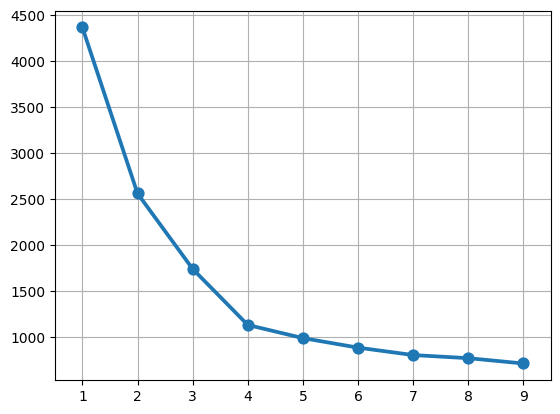

In [74]:
# Menyimpan cost untuk berbagai nilai k
cost = {}
K_range = range(1, 10)  # Nilai k dari 1 hingga 5

for k in K_range:
    kproto = KPrototypes(n_clusters=k, random_state=42)
    kproto.fit_predict(df_model, categorical = [1,2,3])
    cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

In [75]:
# misal k = 4
# Inisialisasi dan fit K-Prototypes
kproto4 = KPrototypes(n_clusters=4, random_state=42)
kproto4 = kproto4.fit(df_model, categorical=[0,1,2,3])

#Save Model
pickle.dump(kproto4, open('cluster.pkl', 'wb'))

In [76]:
# Menentukan segmen tiap pelanggan
clusters4 = kproto4.predict(df_model, categorical = [0,1,2,3])
print('Segmen Pelanggan: {}\n'.format(clusters4))

# Menggabungkan data awal dan segmen pelanggan
df_final4 = df.copy()
df_final4['cluster'] = clusters4
print(df_final4.head(15))

Segmen Pelanggan: [3 2 2 2 2 0 2 2 0 3 3 3 0 0 0 0 0 0 3 0 3 3 0 0 3 0 3 0 3 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 2 1 0 3 3 3 0 3 0 3 3 0 0 3 0 3 3 3 1 0 0 3 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 0 0 0 3 3 0 0 0 0 0 0 0 0
 3 0 3 0 0 3 0 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 0 3 0 0 0 3 3 3 3 0 0 3 0 0 3
 3 3 0 3 0 0 1 0 0 0 3 3 3 0 3 3 0 2 0 0 3 0 0 3 0 0 0 0 0 0 0 3 0 0 3 1 1
 1 1 1 1 0 3 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 3 1 1 1 1 1 1 3 3 0 0 0 2 3 3 0 2 2 2 2 3 2 1 0 0 3 0 0
 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 2 1 1 1
 1 2 2 2 2 2 1 2 2 2 2 2 3 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 2 2 2 2]

    NIM  Tahun Masuk UIN Jakarta  Tahun Wisuda Bulan Wisuda  \
0     1                     2019          2023     Februari   
1     2                     2018          2024          Mei   
3     4                     20

<ipython-input-77-69b53dd58549>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')


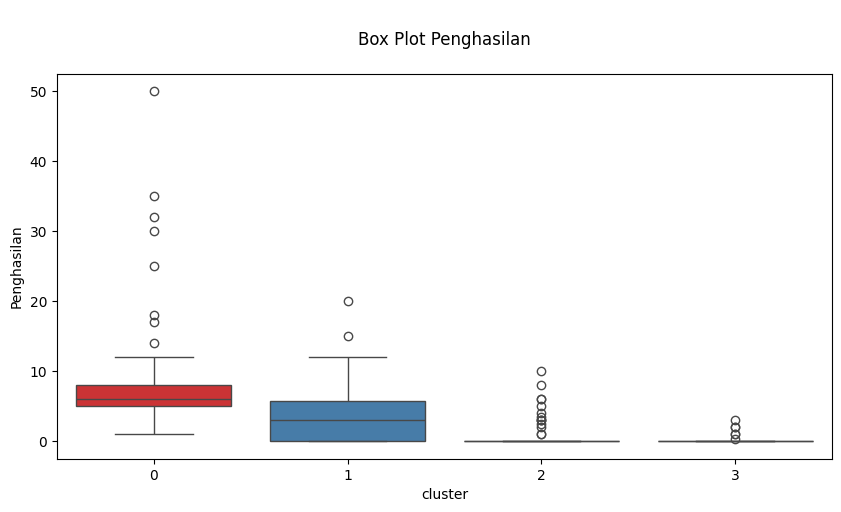

In [77]:
for i in col_num:
    plt.figure(figsize=(10,5))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final4, palette='Set1')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()



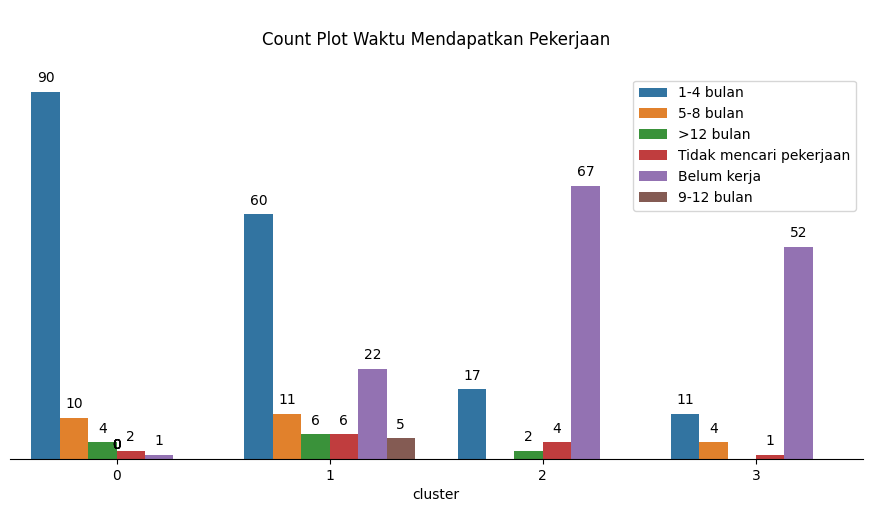

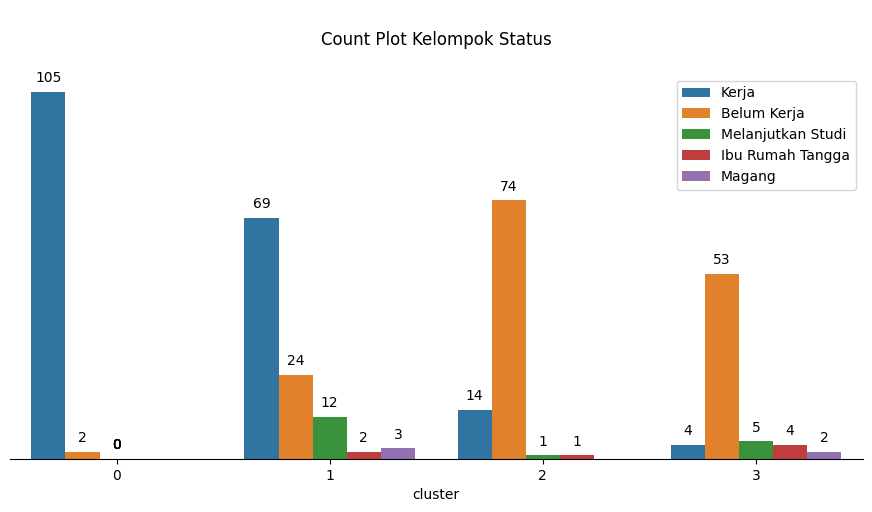

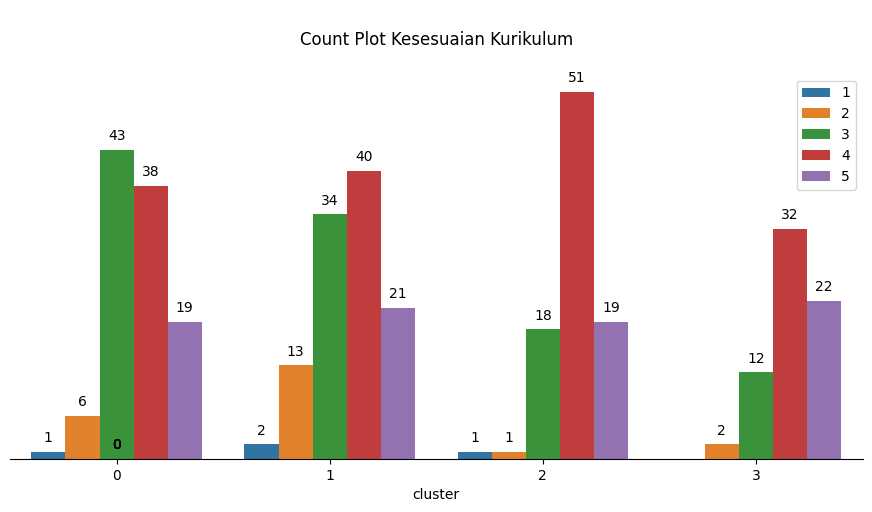

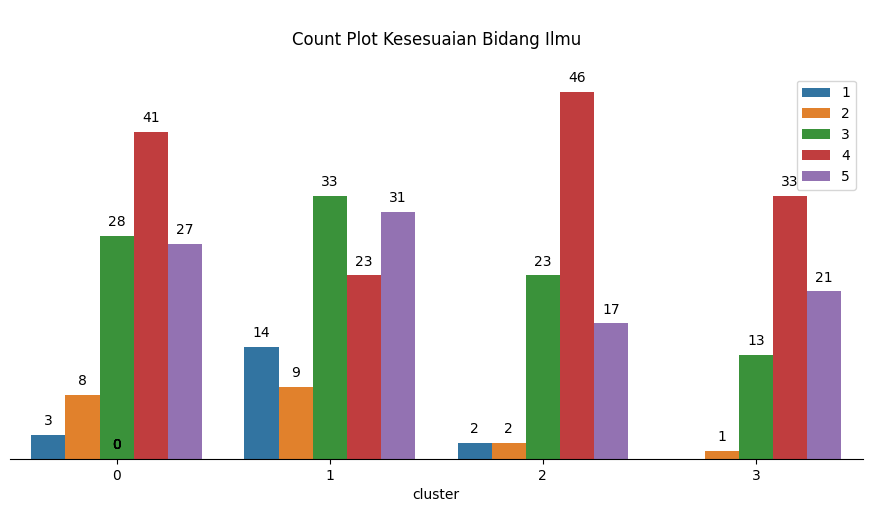

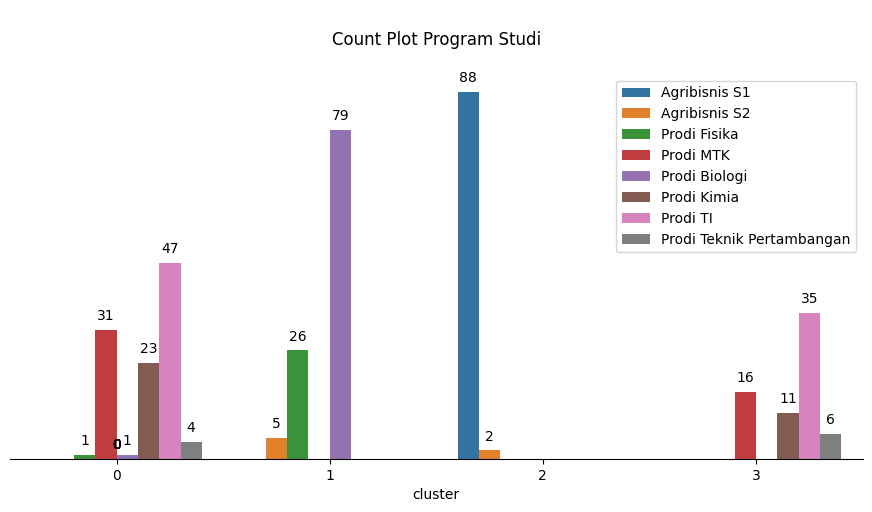

In [78]:
for i in col_cat:
    plt.figure(figsize=(11, 5))
    ax = sns.countplot(data=df_final4, x='cluster', hue=i)

    # Set judul
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper right")

    # Menambahkan jumlah di atas setiap bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.0f'),  # Format angka
            (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi di tengah atas bar
            ha='center', va='center',
            xytext=(0, 10), textcoords='offset points'  # Offset vertikal
        )

    # Menghilangkan garis dan sumbu
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)

    # Tampilkan plot
    plt.show()

#### Rangkuman hasil clustering
###**Cluster 0**
### Waktu mendatkan Pekerjaan ###
- 1-4 Bulan = 90
- 5-8 Bulan = 10
- lebih dari 12 Bulan = 4
- Tidak Mencari Pekerjaan = 2
- Belum Kerja = 1
### Kelompok Status ###
- Kerja = 105
- Belum Kerja = 2
### Kesuaian Kurikulum ###
- 1 = 1
- 2 = 6
- 3 = 43
- 4 = 38
- 5 = 19
### Kesusuaian Bidang Ilmu ###
- 1 = 3
- 2 = 8
- 3 = 28
- 4 = 41
- 5 = 27
### Program Studi ###
- Prodi Fisika = 1
- Prodi MTK = 31
- Prodi Biologi = 1
- Prodi Kimia = 23
- Prodi TI = 47
- Prodi Teknik Tambang = 4


## **Cluster 1**
### Waktu mendatkan Pekerjaan ###
- 1-4 Bulan = 60
- 5-8 Bulan = 11
- 9-12 Bulan = 5
- lebih dari 12 Bulan = 6
- Tidak Mencari Pekerjaan = 6
- Belum Kerja = 22
### Kelompok Status ###
- Kerja = 14
- Belum  = 74
- Melanjutkan Studi = 1
- Ibu Rumah Tangga = 1
### Kesuaian Kurikulum ###
- 1 = 2
- 2 = 13
- 3 = 34
- 4 = 40
- 5 = 21
### Kesusuaian Bidang Ilmu ###
- 1 = 14
- 2 = 9
- 3 = 33
- 4 = 23
- 5 = 31
### Program Studi ###
- Agribisnis S2 = 5
- Prodi Fisika = 26
- Prodi Biologi = 79

## **Cluster 2**
### Waktu mendatkan Pekerjaan ###
- 1-4 Bulan = 17
- lebih dari 12 Bulan = 2
- Tidak Mencari Pekerjaan = 4
- Belum Kerja = 67
### Kelompok Status ###
- Kerja = 4
- Belum Kerja = 53
- Melanjutkan Studi = 5
- Ibu Rumah Tangga = 4
- Magang = 2
### Kesuaian Kurikulum ###
- 1 = 1
- 2 = 1
- 3 = 18
- 4 = 51
- 5 = 19
### Kesusuaian Bidang Ilmu ###
- 1 = 2
- 2 = 2
- 3 = 23
- 4 = 46
- 5 = 17
### Program Studi ###
- Agribisnis S1 = 88
- Agribisnis S2 = 22

## **Cluster 3**
### Waktu mendatkan Pekerjaan ###
- 1-4 Bulan = 11
- 5-8 Bulan = 4
- Tidak Mencari Pekerjaan = 1
- Belum Kerja = 52
### Kelompok Status ###
- Kerja = 4
- Belum Kerja = 53
- Melanjutkan Studi = 5
- Ibu Rumah Tangga = 4
- Magang = 2
### Kesuaian Kurikulum ###
- 2 = 2
- 3 = 12
- 4 = 32
- 5 = 22
### Kesusuaian Bidang Ilmu ###
- 2 = 1
- 3 = 13
- 4 = 33
- 5 = 21
### Program Studi ###
- Prodi MTK = 16
- Prodi Kimia = 11
- Prodi TI = 35
- Prodi Teknik Tambang = 6

Berikut merupakan beberapa insight dan rekomendasi saran berdasarkan analisis tiap cluster:

**Cluster 0**
- Insight:
  - Sebagian besar lulusan pekerjaan dalam waktu 1-4 bulan, menunjukkan potensi daya serap yang baik di lapangan kerja.
  - Hampir seluruh lulusan sudah bekerja, menunjukkan tingkat kemampuan kerja yang tinggi.
  - Kesuaian kurikulum dan bidang ilmu rata-rata cukup tinggi, dengan nilai mayoritas berada pada skor 3 hingga 5.
  - Program Studi Teknologi Informasi (TI) dan Matematika memiliki jumlah lulusan paling besar yaitu sebanyak 47 dan 31.
- Rekomendasi:
  - Melakukan evaluasi lebih lanjut terhadap kurikulum untuk menyesuaikannya dengan tren industri, terutama untuk Prodi Fisika dan Kimia.
  - Memperluas kerjasama dengan perusahaan untuk meningkatkan kesesuaian kurikulum, khususnya bagi prodi dengan lulusan terbanyak, seperti TI dan Matematika.
  - Perlunya promosi studi untuk memperluas akses informasi dan dukungan agar mereka yang tertarik dengan jenjang pendidikan lebih tinggi.

**Cluster 1**
- Insight:
  - Terdapat 74 lulusan yang belum bekerja, dan jumlah lulusan yang memerlukan waktu 5-8 bulan atau lebih untuk mendapatkan pekerjaan cukup signifikan.
  - Lulusan dari Prodi Fisika dan Biologi mendominasi cluster ini.
  - Banyak lulusan yang menilai kesesuaian bidang ilmu di skor 3 dan 4, menandakan potensi kecocokkan antara kurikulum dan kebutuhan industri.
- Rekomendasi:
  - Perlu peninjauan kurikulum untuk meningkatkan kesesuaian dengan bidang ilmu, khususnya untuk Prodi Fisika dan Biologi, guna mempercepat lulusan dalam mendapatkan pekerjaan.
  - Membuat program pelatihan tambahan yang dapat memperkuat kompetensi lulusan yang belum bekerja, seperti pelatihan keterampilan teknis atau soft skills.
  - Perlunya promosi studi untuk memperluas akses informasi dan dukungan agar mereka yang tertarik dengan jenjang pendidikan lebih tinggi.

**Cluster 2**
- Insight:
  - Terdapat banyak lulusan yang belum bekerja dan sebagian besar berasal dari program studi Agribisnis S1 dan S2.
  - Waktu mendapatkan pekerjaan di cluster ini cukup lama, dengan beberapa lulusan yang membutuhkan lebih dari 12 bulan untuk bekerja.
- Rekomendasi:
  - Menambahkan lebih banyak komponen praktis atau internship dalam kurikulum Agribisnis untuk menambah pengalaman lulusan dan mempersiapkan diri untuk terjun ke lapangan kerja.
  -  Memperluas jaringan dengan perusahaan atau institusi yang bergerak di sektor agribisnis agar lulusan lebih mudah memperoleh pekerjaan di bidang yang relevan.
  - Mengadakan workshop atau pelatihan pencarian kerja untuk lulusan yang belum bekerja, termasuk pengembangan CV, wawancara kerja, dan keterampilan digital.

**Cluster 3**
- Insight:
  - Sebagian besar lulusan belum bekerja.
  - Prodi TI dan Teknik Tambang cukup mendominasi cluster ini, menunjukkan bahwa bidang ini memiliki beberapa kendala dalam proses penyerapan kerja.
- Rekomendasi:
  -  Melakukan evaluasi kurikulum, khususnya pada program TI dan Teknik Tambang, untuk memastikan lulusan memiliki keterampilan yang dibutuhkan oleh industri.
  - Memfasilitasi lulusan dalam mengakses informasi tentang lowongan pekerjaan, magang, dan pelatihan soft skill yang dibutuhkan.
  - Memberikan kesempatan magang atau kerja paruh waktu untuk lulusan, terutama di bidang Teknik dan TI, agar mereka memiliki pengalaman yang mendukung untuk memperoleh pekerjaan tetap.

# **Beberapa pertanyaan/hipotesis**

Dari semua analisa yang kami lakukan pada data alumni.csv ini, didapatkan beberapa pertanyaan/hipotesis:

1. Bagaimana para alumni menilai kesesuaian kurikulum dengan kebutuhan lapangan pekerjaan?
2. Apakah lama studi memiliki pengaruh terhadap penghasilan bagi para alumni?
3. Program studi apa yang memiliki rata-rata penghasilan tertinggi?
4. Bagaimana tren waktu yang dibutuhkan para alumni untuk mendapatkan pekerjaan berdasarkan dari tahun wisuda?
5. Bagaimana proporsi alumni yang setelah lulus menjadi seorang wirausaha dan
6. Apakah terdapat tren peningkatan atau penurunan dalam tingkat penghasilan lulusan seiring waktu?
7. Apakah ada jurusan tertentu yang memiliki kesesuaian bidang ilmu yang tinggi dengan pekerjaan alumni?
8. Bagaimana persebaran lama studi di masing masing program studi?
9. Bagaimana tren kelulusan dari tahun ke tahun berdasarkan kuesioner?
10. Bagaimana status lulusan dari masing masing program studi? Program studi mana yang lulusannya belum bekerja?

# **Jawaban**

## 1. Bagaimana para alumni menilai kesesuaian kurikulum dengan kebutuhan lapangan pekerjaan?

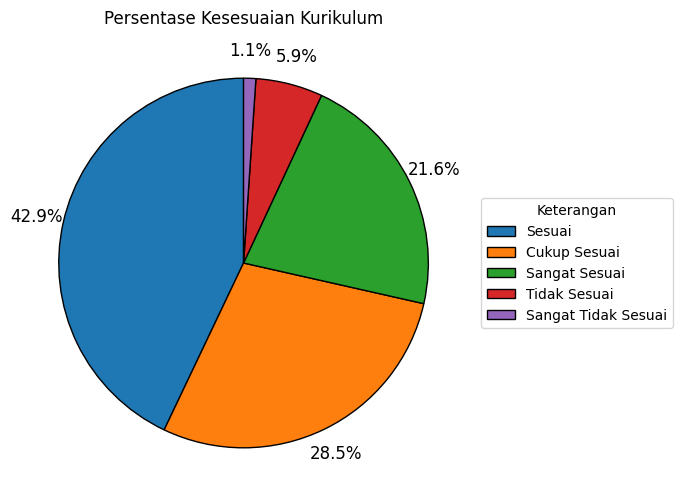

In [79]:
# Mapping angka ke kategori
mapping_kesesuaian = {1:'Sangat Tidak Sesuai', 2:'Tidak Sesuai', 3:'Cukup Sesuai', 4:'Sesuai', 5:'Sangat Sesuai'}
df['Kesesuaian Kurikulum'] = df['Kesesuaian Kurikulum'].map(mapping_kesesuaian)

# Menghitung persentase tiap kategori di kolom 'Kesesuaian Kurikulum'
kesesuaian_counts = df['Kesesuaian Kurikulum'].value_counts(normalize=True) * 100

# Warna untuk setiap kategori
colors = ['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#99ccff']

# Membuat plot pie chart
plt.figure(figsize=(6,6))

# Pie chart dengan persentase dan label di luar chart
wedges, texts, autotexts = plt.pie(
    kesesuaian_counts,
    autopct='%1.1f%%',               # Menampilkan persentase
    startangle=90,                   # Memulai dari sudut 90 derajat (dari atas)
    pctdistance=1.15,                # Jarak persentase dari pusat pie
    wedgeprops={'edgecolor': 'black'}  # Menambahkan garis tepi hitam pada wedges
)

# Mengatur font size dan warna untuk persentase
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)

# Menambahkan legend di luar chart
plt.legend(wedges, kesesuaian_counts.index, title="Keterangan", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mengatur judul
plt.title('Persentase Kesesuaian Kurikulum')

# Tampilkan chart
plt.show()

- **Insight :** Dari hasil visualisasi, hampir setengah (42.9%) dari lulusan yang mengisi kuesioner menganggap bahwa kurikulum yang diberikan masing masing program studi sudah sesuai dengan kebutuhan lapangan pekerjaan yang mereka inginkan. Walaupun begitu, ada total 7% lulusan yang menganggap bahwa kurikulum tidak sesuai dengan lapangan pekerjaan. Meskipun begitu, FST harus terus melakukan review berkala agar tingkat kesesuaiannya meningkat.

- **Saran dan rekomendasi :** Lakukan review berkala terhadap kurikulum di setiap satu tahun kelususan mahasiswa dengan melibatkan alumni dan industri untuk memastikan materi yang diajarkan relevan dengan perkembangan teknologi dan kebutuhan pasar kerja, dan mungkin bisa lebih fokus pada kemampuan praktis dan problem-solving yang dibutuhkan dalam industri saat ini.

## 2. Apakah lama studi memiliki pengaruh terhadap penghasilan bagi para alumni?

In [80]:
# Memisahkan data yang lama studinya adalah 3 tahun
studi_3 = df[df['Lama Studi'] == 3]
dfbaru = df[df['Lama Studi'] != 3]

Kami memisahkan data tersebut karena rata rata mahasiswa menyelesaikan studinya paling cepat 3.5 tahun. Kami menganggap data ini bisa jadi sebagai noise atau memang di kenyataan para mahasiswa ini adalah orang yang jenius dan bisa ditangani dengan cara lain oleh pihak FST nanti

<ipython-input-81-4e05e6ea21ed>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_income_by_study_duration, x='Lama Studi', y='Penghasilan', palette='tab10')


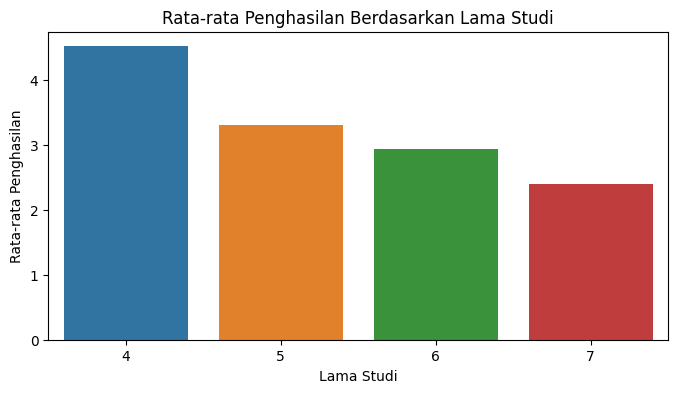

In [81]:
# Menghitung rata-rata penghasilan berdasarkan lama studi
avg_income_by_study_duration = dfbaru.groupby('Lama Studi')['Penghasilan'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_income_by_study_duration, x='Lama Studi', y='Penghasilan', palette='tab10')
plt.title('Rata-rata Penghasilan Berdasarkan Lama Studi')
plt.xlabel('Lama Studi')
plt.ylabel('Rata-rata Penghasilan')
plt.show()

- **Insight :** Dari hasil visualisasi menunjukkan bahwa mahasiswa yang lulusnya tepat (3.5 tahun sampai 4 tahun) memiliki rata-rata penghasilan yang tinggi dibandingkan dengan mahasiswa yang lulus lebih lama. Ini berkaitan dengan persyaratan di dunia kerja yaitu batasan umur. Bahwa banyak perusahaan yang memilih untuk merekrut 'fresh graduate' atau mahasiswa yang baru lulus karena berdasarkan beberapa hal, diantaranya adalah memiliki potensi untuk berkembang, pengetahuan yang up-to-date, ambisius, semangat belajar tinggi, inovatif, dll. Tetapi banyak faktor yang menyebabkan mahasiswa lulus lebih lama, salah satunya adalah masalah ekonomi.

- **Saran dan rekomendasi :** Pihak FST diharapkan segera mengevaluasi tentang efisiensi kurilkulum dan segala hambatan yang membuat mahasiswa lulus lebih lama. Salah satu masalahnya mungkin adalah faktor ekonomi, FST bisa memberikan diskon kepada mahasiswa yang belum lulus karena terhambat ekonomi. Selain itu, FST bisa membuat program bimbingan intensif bagi mahasiswa yang membutuhkan waktu lebih lama untuk menyelesaikan studi, dan tinjau ulang mata kuliah yang memakan waktu lama untuk diselesaikan.


## 3. Program studi apa yang memiliki rata-rata penghasilan tertinggi?

<ipython-input-82-c84d200d94b3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_income_by_program = df.groupby('Program Studi')['Penghasilan'].mean().reset_index()
<ipython-input-82-c84d200d94b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_income_by_program.sort_values('Penghasilan'), x='Penghasilan', y='Program Studi', palette='rocket')


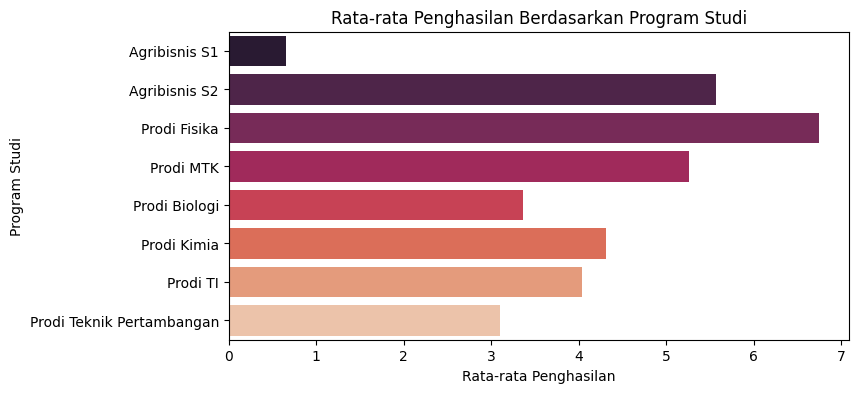

In [82]:
avg_income_by_program = df.groupby('Program Studi')['Penghasilan'].mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(data=avg_income_by_program.sort_values('Penghasilan'), x='Penghasilan', y='Program Studi', palette='rocket')
plt.title('Rata-rata Penghasilan Berdasarkan Program Studi')
plt.xlabel('Rata-rata Penghasilan')
plt.ylabel('Program Studi')
plt.show()

- **Insight :** Rata-rata pendapatan tertinggi ke-3 secara berurutan adalah Prodi Fisika diikuti oleh Prodi Agribisnis S2 lalu Prodi Matematika. Prodi Fisika dan Agribisnis S2 memiliki pendapatan yang relatif lebih tinggi dibandingkan program lainnya, sementara Prodi Biologi dan Prodi Teknik Pertambangan menunjukkan rata-rata pendapatan yang lebih rendah. Alasan yang membuat Agribisnis S2 menjadi yg tertinggi adalah karena tingkat pendidikannya yang lebih tinggi dibanding prodi yang lain.

- **Saran dan rekomendasi :** Peningkatan kurikulum untuk program studi yang penghasilan lulusannya lebih rendah dengan meninjau ulang kurikulumnya agar selaras degnan kebutuhan industri. Penguatan jaringan alumni dan program mentorship juga penting, alumni yang memiliki pendapatan yang tinggi dapat memberikan bimbingan karier kepada lulusan baru.

## 4. Bagaimana tren waktu yang dibutuhkan para alumni untuk mendapatkan pekerjaan berdasarkan dari tahun wisuda?


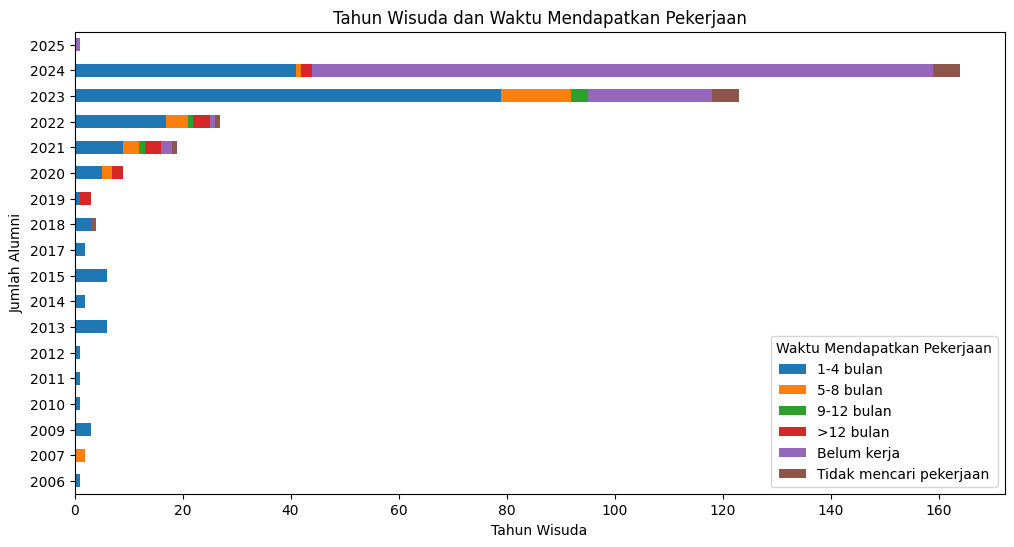

In [83]:
job_time_analysis = df.groupby(['Tahun Wisuda', 'Waktu Mendapatkan Pekerjaan']).size().unstack(fill_value=0)
job_time_analysis.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Tahun Wisuda dan Waktu Mendapatkan Pekerjaan')
plt.xlabel('Tahun Wisuda')
plt.ylabel('Jumlah Alumni')
plt.legend(title='Waktu Mendapatkan Pekerjaan')
plt.show()

- **Insight :** Mayoritas alumni dari tahun kelulusan 2023 ke belakang membutuhkan waktu 1-4 bulan untuk mendapatkan pekerjaan. Namun, mulai tahun 2024 hingga 2025 kebanyakan alumni tercatat belum bekerja atau tidak mencari pekerjaan. Ini dikarenakan mereka baru wisuda atau masih ingin memulai wirausaha. Alumni dari tahun 2022 ke belakang memliki distribusi waktu mendapatkan pekerjaan yang lebih beragam, sampai ada yang membutuhkan waktu lebih dari 12 bulan atau setahun lebih. Tren ini tampaknya menurun di tahun-tahun setelah 2022 yang menunjukkan adanya peningkatan dalam kesiapan kerja.

- **Saran dan rekomendasi :** Mengingat banyaknya alumni tahun 2024 dan 2025 yang belum bekerja atau tidak mencari pekerjaan, pihak FST dapat memberikan  program bimbingan karier yang intensif, seperti pelatihan soft skill, konsultasi karier, atau mengundang dan mengajak perusahaan untuk membuka loker kepada para lulusan baru. Selain itu, pihak FST juga bisa mengadakan monitoring secara berkala terhadap lulusan baru setiap tahunnya untuk melacak perkembangan karier mereka.

## 5. Bagaimana proporsi alumni yang setelah lulus menjadi seorang wirausaha dan apa saja bidang wirausahanya?

In [84]:
# Menyederhanakan kategori bidang wirausaha
usaha_mapping = {'NayaOutfit : Usaha di bidang fashion muslimah dengan memenafaatkan e-commerce shopee, tiktok, lazada... Faeyzabouquet: membuat kerajinan buket dengan jangkauan yang cukup luas... Famanany_style : fashion anak muda namun sedang tidak beroperasi':'Fashion',
                 'Pendidikan / Training':'Pendidikan',
                 'KOS':'Properti',
                 'Jasa Konsultan':'Jasa',
                 'Usaha kuliner, menjual aneka dimsum dengan berbagai toping dijual secara offline maupun online':'Kuliner',
                 'Membuka les privat bagi siswa SD-SMA di bidang matematika, fisika, kimia, dan menjadi co-founder GeoXplore Indonesia':'Pendidikan',
                 'Explorasi Geofisika khususnya air tanah menggunakan metode elektromagnetik ':'Penelitian',
                 'Konsultan IT ':'Jasa',
                 'Bimbingan Belajar':'Pendidikan',
                 'Seni dan kerajinan':'Industri Kreatif',
                 'STEM Education dan Software Development':'Pendidikan',
                 'Textile':'Tekstil',
                 'Makanan':'Kuliner',
                 'Menjual tiket saat ada suatu acara':'Bisnis',
                 'Bisnis souvenir custom CD album (shopee: pinahouse studio)':'Bisnis',
                 'Jasa traik tunai ':'Jasa',
                 'Bisnis Olshop':'Bisnis',
                 'Digital printing':'Percetakan',
                 'usaha makanan ringan dan kue kering rumahan':'Kuliner',
                 'makanan ringan dan pernak pernik ':'Kuliner',
                 'Jasa Wisata Alam dan Jasa Laundry Sepatu':'Jasa',
                 'Peternakan sapi perah ':'Peternakan',
                 'Kue':'Kuliner',
                 'Menjual pakaian anak di toko dan online':'Fashion',
                 'tahun 2018 saya mendirikan boutique fashion yang bernama lalashopyyy sampai saat ini, lalashopyyy menjual barang seperti tas, baju, celana, sepatu, dan sebagainya, toko lalashopyyy sudah ada di Google Maps dan juga terdapat toko onlineshop di beberapa e commerce seperti shopee dan instagram yang bernama lalashopyyy.':'Fashion',
                 'Fashion and beauty':'Fashion'}

df['Bidang wirausaha'] = df['Bidang wirausaha'].map(usaha_mapping)

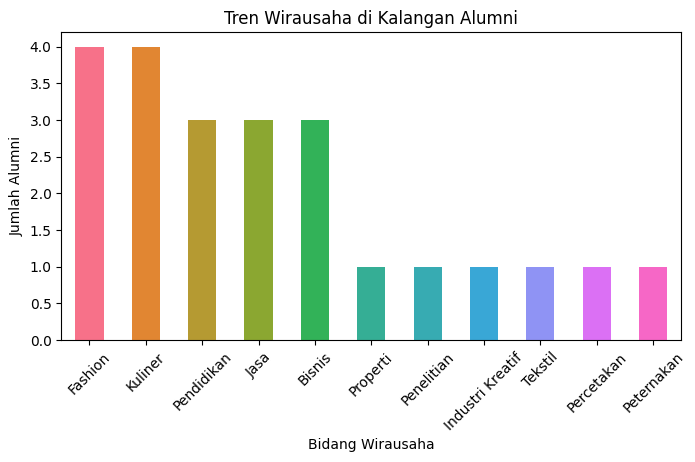

In [85]:
entrepreneurship_counts = df['Bidang wirausaha'].value_counts()

colors = sns.color_palette('husl', len(entrepreneurship_counts))
entrepreneurship_counts.plot(kind='bar', figsize=(8, 4), color=colors)
plt.title('Tren Wirausaha di Kalangan Alumni')
plt.xlabel('Bidang Wirausaha')
plt.ylabel('Jumlah Alumni')
plt.xticks(rotation=45)
plt.show()

- **Insight :** Dari grafik diketahui bahwa alumni yang berwirausaha sangatlah sedikit, dengan bidang wirausaha terbanyak adalah Fashion dan Kuliner. Di bidang pendidikan, Jasa dan Bisnis juga menarik minat alumni dengan jumlah yang cukup signifikan, meskipun lebih rendah dibandingkan Fashion dan Kuliner.

- **Saran dan Rekomendasi :** Mengingat sedikitnya alumni yang berwirausaha, pihak FST bisa menyesuaikan kurikulum tentang pentingnya berwirausaha.

## 6. Apakah terdapat tren peningkatan atau penurunan dalam tingkat penghasilan lulusan seiring tahun wisuda?

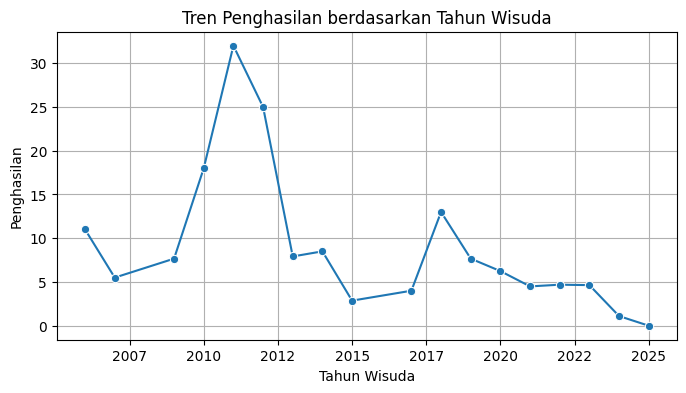

In [86]:
from matplotlib.ticker import FuncFormatter

# Mengurutkan data berdasarkan 'Tahun Wisuda' jika perlu
df_sorted = df.sort_values('Tahun Wisuda')

plt.figure(figsize=(8, 4))

# Membuat line plot
sns.lineplot(x='Tahun Wisuda', y='Penghasilan', data=df_sorted, marker='o', errorbar=None)
plt.title('Tren Penghasilan berdasarkan Tahun Wisuda')
plt.xlabel('Tahun Wisuda')
plt.ylabel('Penghasilan')
plt.grid(True)  # Menambahkan grid untuk membantu visualisasi

# Mengatur format tahun di sumbu x agar tidak ada koma
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

plt.show()


- **Insight :** Penghasilan alumni mengalami fluktuasi yang cukup besar. Terdapat kenaikan signifikan di sekitar tahun 2011-2013, dengan puncak penghasilan tertinggi pada tahun 2013. Namun, setelah itu, penghasilan cenderung menurun. Setelah tahun 2015, terlihat tren penurunan yang konsisten hingga tahun 2025, dengan penghasilan yang jauh lebih rendah dibandingkan tahun-tahun sebelumnya.  Penghasilan alumni tahun wisuda terbaru (2025) berada di titik terendah karena ia mahasiswa yang baru ingin lulus.

- **Saran dan rekomendasi :** Sama seperti sebelumnya, penurunan penghasilan mungkin menandakan bahwa kurikulum yang ada perlu disesuaikan dengan kebutuhan pasar saat ini. FST bisa melakukan evaluasi berkala pada kurikulum untuk memastikan program pendidikan relevan dan up-to-date dengan tren industri.

## 7. Apakah ada jurusan tertentu yang memiliki kesesuaian bidang ilmu yang tinggi dengan pekerjaan alumni?

In [87]:
# Mapping angka dengan tingkat kesesuaian agar lebih jelas di visualisasi
mapping_ilmu = {1:'Sangat Tidak Sesuai', 2:'Tidak Sesuai', 3:'Cukup Sesuai', 4:'Sesuai', 5:'Sangat Sesuai'}
df['Kesesuaian Bidang Ilmu'] = df['Kesesuaian Bidang Ilmu'].map(mapping_kesesuaian)

<ipython-input-88-97924430c277>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kesesuaian_counts = df.groupby(['Program Studi', 'Kesesuaian Bidang Ilmu']).size().unstack()


<Figure size 1200x600 with 0 Axes>

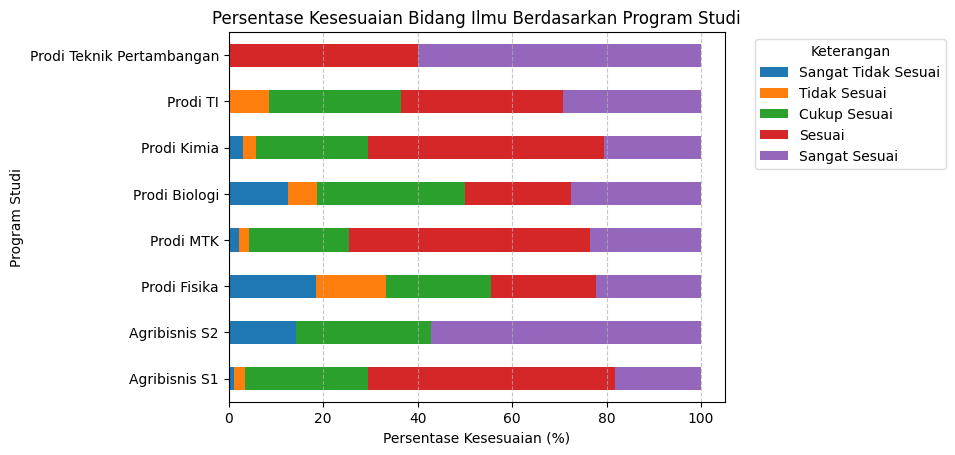

In [88]:
# Menghitung persentase kesesuaian pekerjaan per program studi
kesesuaian_counts = df.groupby(['Program Studi', 'Kesesuaian Bidang Ilmu']).size().unstack()
kesesuaian_percentage = (kesesuaian_counts.div(kesesuaian_counts.sum(axis=1), axis=0) * 100)

# Membuat palet warna
colors = sns.color_palette("tab10", kesesuaian_percentage.shape[1])  # Pilih warna berdasarkan jumlah kolom

# Membuat bar plot dengan warna berbeda
plt.figure(figsize=(12, 6))
kesesuaian_percentage.plot(kind='barh', stacked=True, color=colors)  # `stacked=True` agar batang setiap kategori terpisah
plt.title("Persentase Kesesuaian Bidang Ilmu Berdasarkan Program Studi")
plt.xlabel("Persentase Kesesuaian (%)")
plt.ylabel("Program Studi")
plt.legend(title="Keterangan", loc='upper right', bbox_to_anchor=(1.46, 1), framealpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

- **Insight :** Berdasarkan hasil visualisasi, lulusan Teknik Pertambangan memiliki tingkat kesesuaian bidang ilmu yang tinggi (sangat sesuai), melainkan untuk jurusan yang lain cukup beragam tingkat kesesuaian bidang ilmunya. Persentase pada kategori tidak sesuai paling banyak ada pada Prodi Fisika diikuti oleh Agribisnis S2 lalu Prodi Biologi. Ini mengartikan bahwa banyak lulusan Prodi Teknik Pertambangan yang prospek kerjanya sesuai dengan bidang ilmu yang dipelajari. Sedangkan pada Prodi Fisika, Agribisnis S2, dan Biologi sebagian kecil lulusannya memiliki pekerjaan yang tidak sesuai bidang ilmunya.

- **Saran dan rekomendasi :** Untuk prodi yang memiliki kesesuaian bidang ilmu dengan prospek kerja yang rendah, dapat melakukan peninjauan kurikulum sama seperti insight yang sebelumnya, yaitu apakakah kurikulum yang digunakan masih relevan atau tidak dengan kebutuhan industri. Bagi prodi yang memiliki kesesuaian yang beragam dapat mempertimbangkan untuk memperbanyak pilihan lintas disiplin, memperkuat soft skill, dan skill yang lain.

## 8. Bagaimana persebaran lama studi di masing masing program studi?

<ipython-input-89-3c7c523cba1c>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = pd.pivot_table(df, values='NIM', index='Program Studi', columns='Lama Studi', aggfunc='count', fill_value=0)


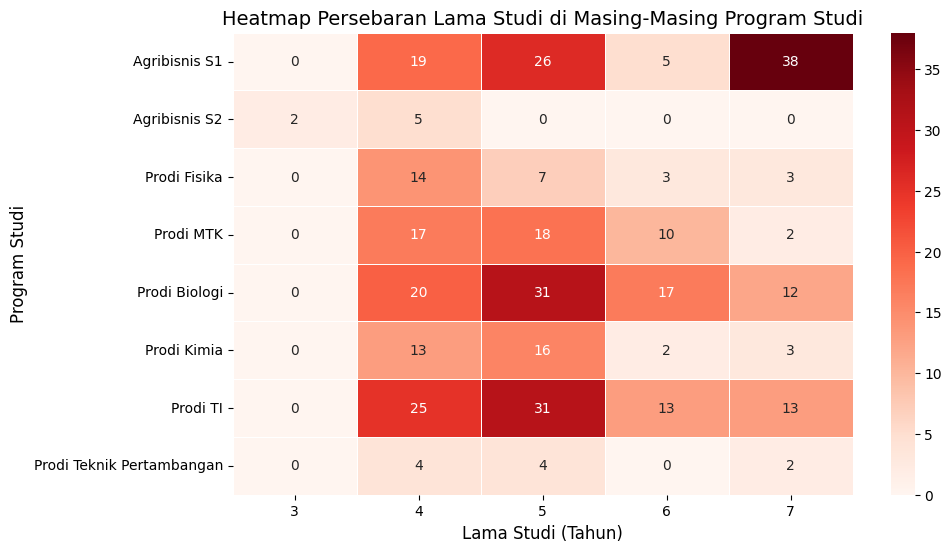

In [89]:
# Membuat pivot table untuk jumlah lama studi per program studi
heatmap_data = pd.pivot_table(df, values='NIM', index='Program Studi', columns='Lama Studi', aggfunc='count', fill_value=0)

# Membuat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", linewidths=0.5, fmt='d')

# Menambahkan judul dan label
plt.title('Heatmap Persebaran Lama Studi di Masing-Masing Program Studi', fontsize=14)
plt.xlabel('Lama Studi (Tahun)', fontsize=12)
plt.ylabel('Program Studi', fontsize=12)

# Menampilkan plot
plt.show()


- **Insight :** Terdapat 2 lulusan yang studinya hanya 3 tahun ini bisa saja noise atau memang lulusan tersebut adalah orang yang jenius. Mahasiswa yang lulus dalam 4 tahun terbanyak ada di Prodi Teknik Informatika. Mahasiswa yang lulus dalam waktu 5 tahun terbanyak ada di Prodi TI dan Prodi Biologi, sedangkan mahasiswa yang lulus paling lama yaitu 7 tahun berada di prodi Agribisnis S1. Ini berarti prodi yang menjalankan studi tepat waktu memiliki sistem dan dukungan yang lebih baik dan efisien.

- **Saran dan rekomendasi :** Program studi yang distribusi lama studinya lebih panjang (5-6 tahun) perlu mengevaluasi mahasiswanya lebih lanjut, dengan meninjau kurikulum dan "ngobrol" dengan mahasiswanya apakah tugas atau kegiatan perkuliahan yang lain membebankan dan menjadi penghambat kelulusan. Selain itu perlu dipertimbangkan juga faktor ekonomi, karena terdapat beberapa kasus mahasiswa yang studinya lama disebabkan oleh faktor tersebut.

## 9. Bagaimana tren kelulusan dari tahun ke tahun berdasarkan kuesioner?

<ipython-input-90-191c5933b9af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tahun Wisuda', data=df, palette='viridis', edgecolor='black')  # Pilih palet warna cerah dan garis tepi


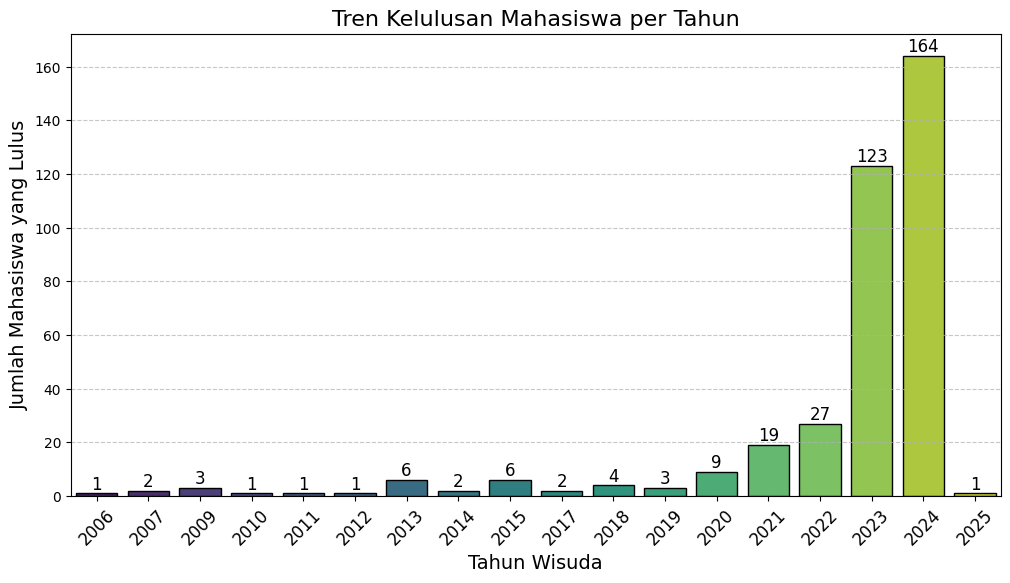

In [90]:
# Membuat count plot untuk jumlah mahasiswa yang wisuda per tahun
plt.figure(figsize=(12, 6))  # Ukuran figure yang lebih besar
sns.countplot(x='Tahun Wisuda', data=df, palette='viridis', edgecolor='black')  # Pilih palet warna cerah dan garis tepi

# Menambahkan judul dan label
plt.title('Tren Kelulusan Mahasiswa per Tahun', fontsize=16)
plt.xlabel('Tahun Wisuda', fontsize=14)
plt.ylabel('Jumlah Mahasiswa yang Lulus', fontsize=14)

# Menambahkan anotasi jumlah pada setiap batang
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12, color='black',
                 rotation=0)

# Menambahkan grid untuk membantu pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Memutar label pada sumbu x agar lebih terbaca
plt.xticks(rotation=45, fontsize=12)

# Menampilkan plot
plt.show()


In [91]:
# Program studi mahasiswa yang lulus di tahun 2024
df[df['Tahun Wisuda']==2024]['Program Studi'].value_counts()

,count
Program Studi,
Agribisnis S1,86
Prodi TI,35
Prodi Biologi,16
Prodi Kimia,14
Prodi MTK,7
Prodi Teknik Pertambangan,6
Agribisnis S2,0
Prodi Fisika,0


- **Insight :** Terjadinya peningkatan yang signifikan dari jumlah kelulusan mahasiswa dimulai dari tahun 2020 sampai 2024. Peningkatan ini mencapai puncaknya di tahun 2024 dengan total 164 mahasiswa yang terdiri dari 86 orang Prodi Agribisnis S1, 35 orang Prodi Teknik Informatika, 16 Prodi Biologi, 14 Prodi kimia, dan 14 mahasiswa dari Prodi yang lain. Ini berarti adanya peningkatan kualitas atau peningkatan mahasiswa di tahun tersebut.

- **Saran dan rekomendasi :** Disarankan untuk mempertahankan jumlah kelulusan yang terus meningkat tersebut dengan menjaga kualitas pembelajaran, kurikulum yang relevan dengan keadaan atau fenomena yang terjadi, dan selalu memantau para alumninya dan mendatanya.

## 10. Bagaimana status lulusan dari masing masing program studi? Program studi mana yang lulusannya belum bekerja?

Untuk visualisasi yang pertama, kami mengelompokkan status saat ini agar plotnya terlihat lebih jelas, sehingga mendapatkan gambaran lebih umum dari persebaran status saat ini berdasarkan lulusan masing masing prodi.

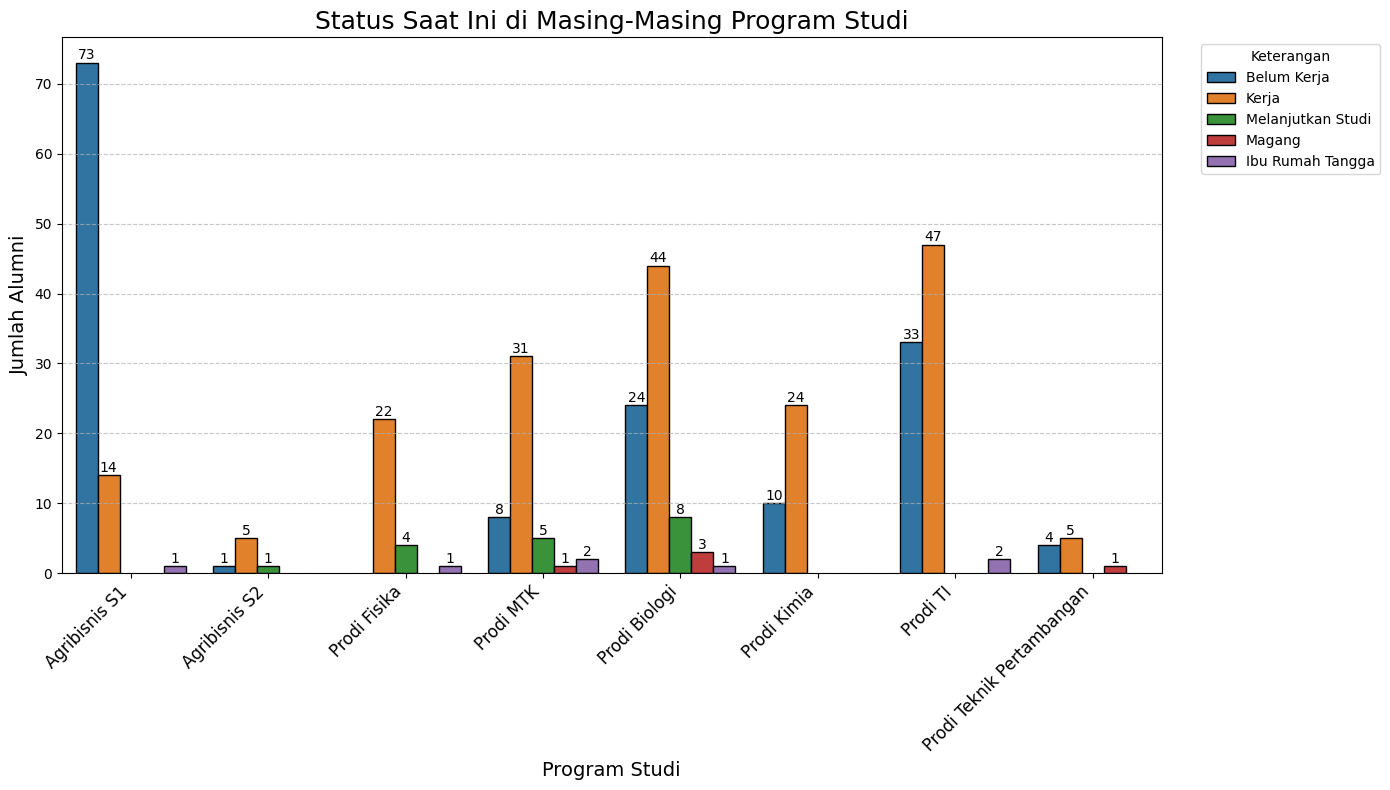

In [92]:
# Membuat figure lebih besar agar tampilan lebih jelas
plt.figure(figsize=(14, 8))

# Membuat countplot untuk status saat ini berdasarkan program studi
ax = sns.countplot(x='Program Studi', hue='Kelompok Status', data=df, palette='tab10', dodge=True, edgecolor='black')

# Menambahkan judul dan label
plt.title('Status Saat Ini di Masing-Masing Program Studi', fontsize=18)
plt.xlabel('Program Studi', fontsize=14)
plt.ylabel('Jumlah Alumni', fontsize=14)

# Memutar label pada sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan jumlah alumni
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan legenda dengan judul dan menempatkannya di luar plot
plt.legend(title='Keterangan', bbox_to_anchor=(1.03, 1), loc='upper left')

# Mengatur tata letak agar label tidak terpotong
plt.tight_layout()

# Menambahkan keterangan angka di atas setiap batang
for p in ax.patches:
    height = p.get_height()  # Mendapatkan tinggi dari setiap batang
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Mendapatkan posisi x di tengah batang
            height + 0.5,                   # Menempatkan angka sedikit di atas batang
            f'{int(height)}',               # Angka yang ditampilkan
            ha='center'                     # Pengaturan posisi agar angka berada di tengah batang
        )

# Menampilkan plot
plt.show()


Visualisasi yang kedua ini merupakan plot yang lebih rinci dari status saat ini berdasarkan lulusan masing masing prodi

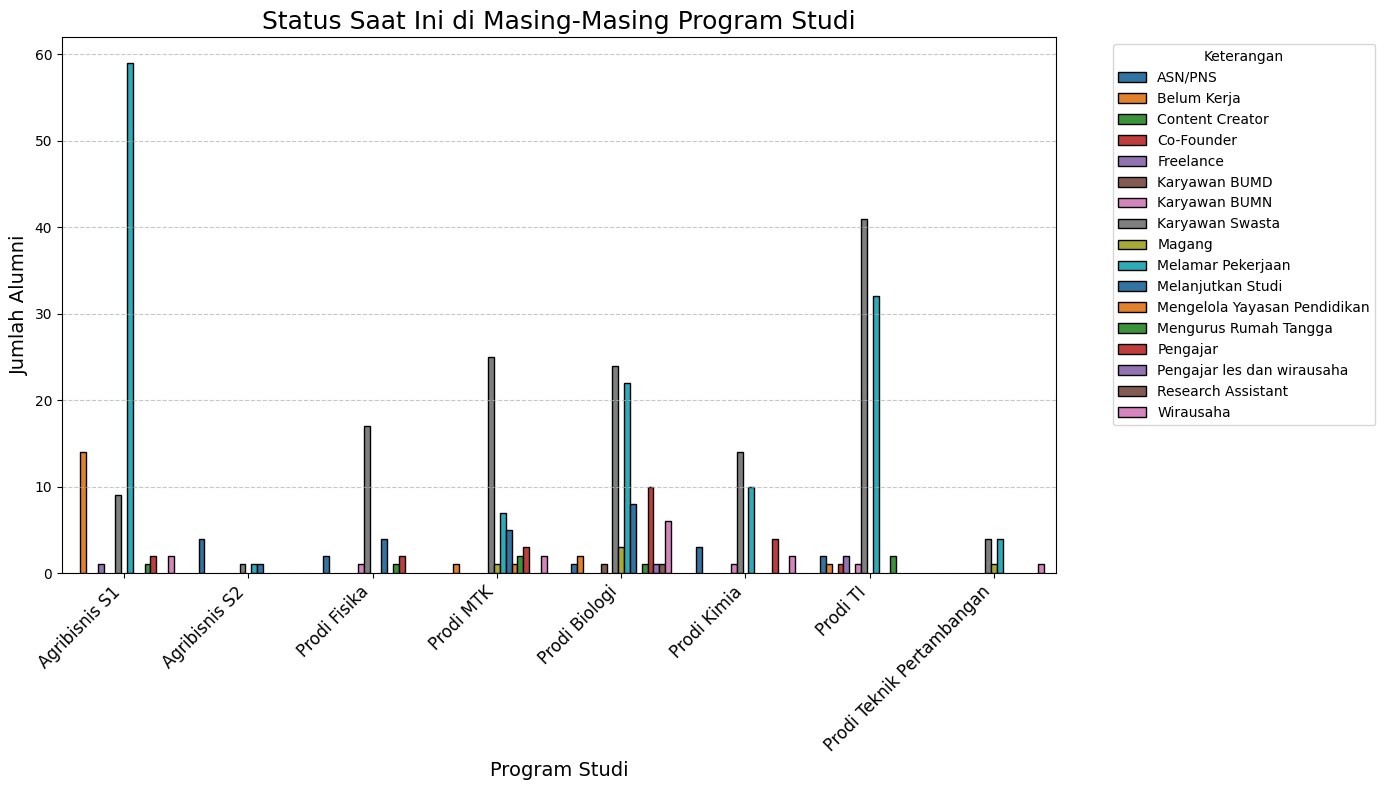

In [93]:
# Membuat figure lebih besar agar tampilan lebih jelas
plt.figure(figsize=(14, 8))

# Membuat countplot untuk status saat ini berdasarkan program studi
sns.countplot(x='Program Studi', hue='Status saat ini', data=df, palette='tab10', dodge=True, edgecolor='black')

# Menambahkan judul dan label
plt.title('Status Saat Ini di Masing-Masing Program Studi', fontsize=18)
plt.xlabel('Program Studi', fontsize=14)
plt.ylabel('Jumlah Alumni', fontsize=14)

# Memutar label pada sumbu x agar lebih terbaca
plt.xticks(rotation=45, ha='right', fontsize=12)

# Menambahkan grid untuk memudahkan pembacaan jumlah alumni
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan legenda dengan judul dan menempatkannya di luar plot
plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mengatur tata letak agar label tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

- **Insight :** Pada Prodi Agribisnis S1 banyak lulusan yang belum bekerja padahal Prodi Agribisnis S1 merupakan salah satu jurusan yang banyak peminatnya dan daya tampungnya cukup besar (berdasarkan Instagram tangsel.life) sehingga ini perlu ditinjaklanjuti penyebab lulusan yang masih belum bekerja atau ingin mencari kerja. Sedangkan pada prodi yang lain, persebaran status saat ini tersebar secara merata walaupun dari mereka masih ada yang belum bekerja. Jumlah tertinggi dari lulusan yang sudah bekerja ada pada Prodi TI dengan 44 mahasiswa, diikuti oleh Prodi Biologi dengna 44 mahasiswa, dan Prodi MTK dengan 31 mahasiswa.

- **Saran dan Rekomendasi :** Meninjau penyebab mengapa Prodi Agribisnis S1 banyak lulusan yang masih belum bekerja, karena ini merupakan salah satu indikator kesuksesan program studi dalam membimbing mahasiswanya setelah kelulusan. Selain itu, Pihak FST juga bisa memeriksa kurikulum terkait, supaya kurikulum tersebut relevan dengan kebutuhan industri saat ini.

# **Kesimpulan dan Saran**

-	Program studi di FST sebaiknya melakukan review dan peningkatan terhadap kurikulum secara berkala dengan cara melibatkan alumni agar kurikulum semakin praktis untuk digunakan dalam dunia kerja.
-	Adanya pengaruh atara lama studi dan rata-rata penghasilan. Saran kami, pihak FST memberikan keringanan pembayaran  untuk mahasiswa yang memiliki masalah ekonomi. Dan memberikan bimbingan intensif bagi mahasiswa yang membutuhkan waktu lebih lama untuk menyelesaikan studi.
-	Program studi di FST harus menguatkan jaringan alumni dan program mentorship yang memiliki pendapatan yang tinggi dapat memberikan bimbingan karier kepada lulusan baru. Dan bekerjasama dengan perusahaan alumni terkait instership atau loker.
-	Pihak FST dapat memberikan sebuah program bimbingan karier, pelatihan soft skill, konsultasi karier, bekerja sama dengan perusahaan untuk membuka loker pada lulusan, dan memonitoring freshgraduate untuk melihat perkembagan karier mereka.
-	Program studi di FST menyediakan mata kuliah yang berhungan dengan wirausaha agar para lulusan mempunyai bekal untuk berwirausaha.
-	Untuk prodi Agribisnis S1, melakukan peninjauan terhadap kurikurulum agar lebih sesuai dengan kebutuhan industri sekarang. Dan membuat program untuk melatih hard skill mahasiswa agribisnis. Atau prodi Agribisnis S1 dapat mempromosikan lulusan dan mahasiswanya untuk lanjut studi karena dapat dilihat dari prodi Agribisnis S2 banyak alumninya yang sudah bekerja.
